# Exploring the NHANES diabetes data

[DSLC stages]: EDA


You can conduct an EDA of the NHANES diabetes dataset in this document.

In [1]:
import pandas as pd

# Load the datasets from CSV files
train_data = pd.read_csv('train_data.csv')
val_data = pd.read_csv('val_data.csv')
test_data = pd.read_csv('test_data.csv')
imputed_2017 = pd.read_csv('imputed_2017.csv')

# Verify the data
print("Training Data:\n", train_data.head())
print("Validation Data:\n", val_data.head())
print("Test Data:\n", test_data.head())

Training Data:
    house_family_person_id        age    smoker       sex  \
0            4.798652e+08  53.538535  0.118349  0.881651   
1            3.221701e+08  27.000000  0.000000  1.000000   
2            5.247501e+08  45.000000  1.000000  1.000000   
3            1.055501e+08  44.000000  1.000000  1.000000   
4            6.575101e+08  76.000000  0.000000  1.000000   

   coronary_heart_disease      weight         bmi     height  hypertension  \
0                     0.0  192.268432  4429.82889  65.528991           1.0   
1                     0.0  120.000000  1937.00000  66.000000           0.0   
2                     0.0  203.000000  3484.00000  64.000000           0.0   
3                     0.0  170.000000  2509.00000  69.000000           0.0   
4                     0.0  120.000000  2267.00000  61.000000           1.0   

   heart_condition  ...  region_Midwest  region_Northwest  region_South  \
0         0.118349  ...             0.0          0.118349      0.881651   
1   

In [2]:
train_data.describe()

house_family_person_id           age        smoker           sex  \
count            3.480600e+04  34806.000000  34806.000000  34806.000000   
mean             3.571586e+08     56.357610      0.447886      0.538884   
std              2.043652e+08     16.719618      0.459912      0.460221   
min              3.010200e+04     18.000000      0.000000      0.000000   
25%              1.824326e+08     45.000000      0.000000      0.000000   
50%              3.572088e+08     59.179219      0.254181      0.684596   
75%              5.324353e+08     68.825496      1.000000      1.000000   
max              7.157601e+08     85.000000      1.000000      1.000000   

       coronary_heart_disease        weight           bmi        height  \
count            34806.000000  34806.000000  34806.000000  34806.000000   
mean                 0.102520    182.590728   2962.101724     66.572403   
std                  0.268065     36.163644    636.148012      3.485581   
min                  0.000000    100.000000   1167.000000     59.000000   
25%                  0.000000    157.633950   2515.732624     64.000000   
50%                  0.000000    180.000000   2875.118170     66.368461   
75%                  0.000000    205.000000   3309.000000     69.000000   
max                  1.000000    299.000000   9412.000000     76.000000   

       hypertension  heart_condition  ...  region_Midwest  region_Northwest  \
count  34806.000000     34806.000000  ...    34806.000000      34806.000000   
mean       0.531639         0.133730  ...        0.369740          0.223971   
std        0.471061         0.306137  ...        0.445142          0.384533   
min        0.000000         0.000000  ...        0.000000          0.000000   
25%        0.000000         0.000000  ...        0.000000          0.000000   
50%        0.692969         0.000000  ...        0.000000          0.000000   
75%        1.000000         0.000000  ...        1.000000          0.338169   
max        1.000000         1.000000  ...        1.000000          1.000000   

       region_South  marital_status_Divorced  \
count  34806.000000             34806.000000   
mean       0.238816                 0.160912   
std        0.396110                 0.335600   
min        0.000000                 0.000000   
25%        0.000000                 0.000000   
50%        0.000000                 0.000000   
75%        0.428023                 0.000000   
max        1.000000                 1.000000   

       marital_status_Living with partner  marital_status_Married  \
count                        34806.000000            34806.000000   
mean                             0.049131                0.445735   
std                              0.204455                0.459258   
min                              0.000000                0.000000   
25%                              0.000000                0.000000   
50%                              0.000000                0.249689   
75%                              0.000000                1.000000   
max                              1.000000                1.000000   

       marital_status_Never_married  marital_status_Separated  \
count                  34806.000000               34806.00000   
mean                       0.176825                   0.02967   
std                        0.360325                   0.15429   
min                        0.000000                   0.00000   
25%                        0.000000                   0.00000   
50%                        0.000000                   0.00000   
75%                        0.000000                   0.00000   
max                        1.000000                   1.00000   

       marital_status_Widdowed      diabetes  
count             34806.000000  34806.000000  
mean                  0.135805      0.501322  
std                   0.308329      0.500005  
min                   0.000000      0.000000  
25%                   0.000000      0.000000  
50%                 

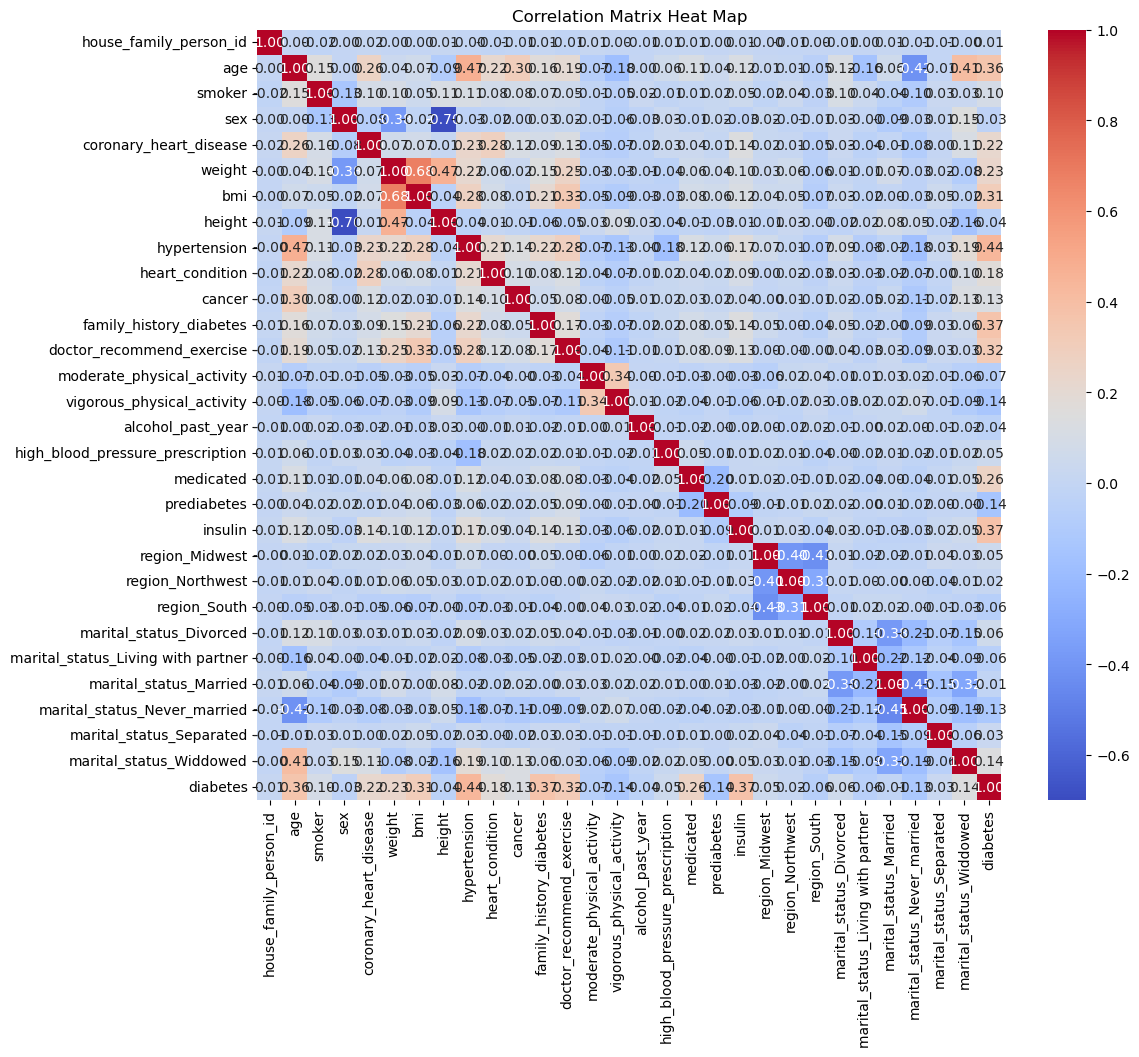

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Create a heat map of the correlation matrix
correlation_matrix = train_data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heat Map')
plt.show()

In [30]:
# Print out the most correlated elements to the 'diabetes' column
diabetes_correlation = correlation_matrix['diabetes'].sort_values(ascending=False)
#print(diabetes_correlation)
correlation_matrix_2017 = imputed_2017.corr()
diabetes_correlation_2017 = correlation_matrix_2017['diabetes'].sort_values(ascending=False)

In [27]:
print(diabetes_correlation['diabetes'])

1.0


In [32]:
import numpy as np
from scipy.stats import norm

# Function to perform Fisher's Z-transformation
def fisher_z_transform(r):
    return 0.5 * np.log((1 + r) / (1 - r))

# Sample sizes for the two datasets
n1 = train_data.shape[0]  # Sample size for dataset 1
n2 = imputed_2017.shape[0]  # Sample size for dataset 2

for c in train_data.columns:
    # Correlation coefficients from the two datasets
    r1 = diabetes_correlation[c]  # Correlation from dataset 1
    r2 = diabetes_correlation_2017[c] # Correlation from dataset 2

    # Perform Fisher's Z-transformation on both correlation coefficients
    z1 = fisher_z_transform(r1)
    z2 = fisher_z_transform(r2)

    # Calculate the Z-statistic for the difference between the two correlations
    z_stat = (z1 - z2) / np.sqrt((1 / (n1 - 3)) + (1 / (n2 - 3)))

    # Calculate the p-value based on the Z-statistic (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_stat)))

    # Output the results
    print(f"Z-statistic: {z_stat}, P-value: {p_value}")

    # Check if the p-value is less than 0.05 (significance level)
    if p_value < 0.05:
        print("Significantly different: ", c)
    else:
        print("Not significantly different: ", c)


Z-statistic: 3.030985108450294, P-value: 0.002437572696130985
Significantly different:  house_family_person_id
Z-statistic: 16.769325991010188, P-value: 0.0
Significantly different:  age
Z-statistic: 4.6540099547545175, P-value: 3.2554107558535605e-06
Significantly different:  smoker
Z-statistic: 0.024840198701154392, P-value: 0.9801824270142776
Not significantly different:  sex
Z-statistic: 7.545499831626003, P-value: 4.5075054799781356e-14
Significantly different:  coronary_heart_disease
Z-statistic: 7.810176880863333, P-value: 5.773159728050814e-15
Significantly different:  weight
Z-statistic: 13.16718019762671, P-value: 0.0
Significantly different:  bmi
Z-statistic: -3.50362824595989, P-value: 0.0004589655957443206
Significantly different:  height
Z-statistic: 21.12002192910174, P-value: 0.0
Significantly different:  hypertension
Z-statistic: 8.748798042619503, P-value: 0.0
Significantly different:  heart_condition
Z-statistic: 5.545770940791346, P-value: 2.926617570508938e-08
Sign

C:\Users\15184\AppData\Local\Temp\ipykernel_22264\865065389.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  return 0.5 * np.log((1 + r) / (1 - r))
C:\Users\15184\AppData\Local\Temp\ipykernel_22264\865065389.py:22: RuntimeWarning: invalid value encountered in scalar subtract
  z_stat = (z1 - z2) / np.sqrt((1 / (n1 - 3)) + (1 / (n2 - 3)))


In [8]:
continuous_columns = ['age', 'bmi', 'weight', 'height', 'alcohol_past_year', 'moderate_physical_activity', 'vigorous_physical_activity']

categorical_columns = train_data.columns.difference(continuous_columns)
cat_columns_plot = categorical_columns.drop(['diabetes', 'house_family_person_id'])

In [9]:

# Define the number of columns per row
cols_per_row = 2
cat_columns_plot = categorical_columns.drop(['diabetes', 'house_family_person_id'])
num_cols = len(cat_columns_plot)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create a figure with subplots for categorical columns
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Determine the common y-axis range
max_count = 0
for column in cat_columns_plot:
    counts = train_data[column].value_counts()
    max_count = max(max_count, counts.max())

for ax, column in zip(axes, cat_columns_plot):
    sns.countplot(data=train_data, x=column, hue='diabetes', ax=ax)
    ax.set_title(f'Count Plot of {column} for Diabetes Cases')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])
    ax.set_ylim(0, max_count)

# Hide any unused subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
plt.savefig('categorical_plots_separeate.png')

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001CFACF12C00> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

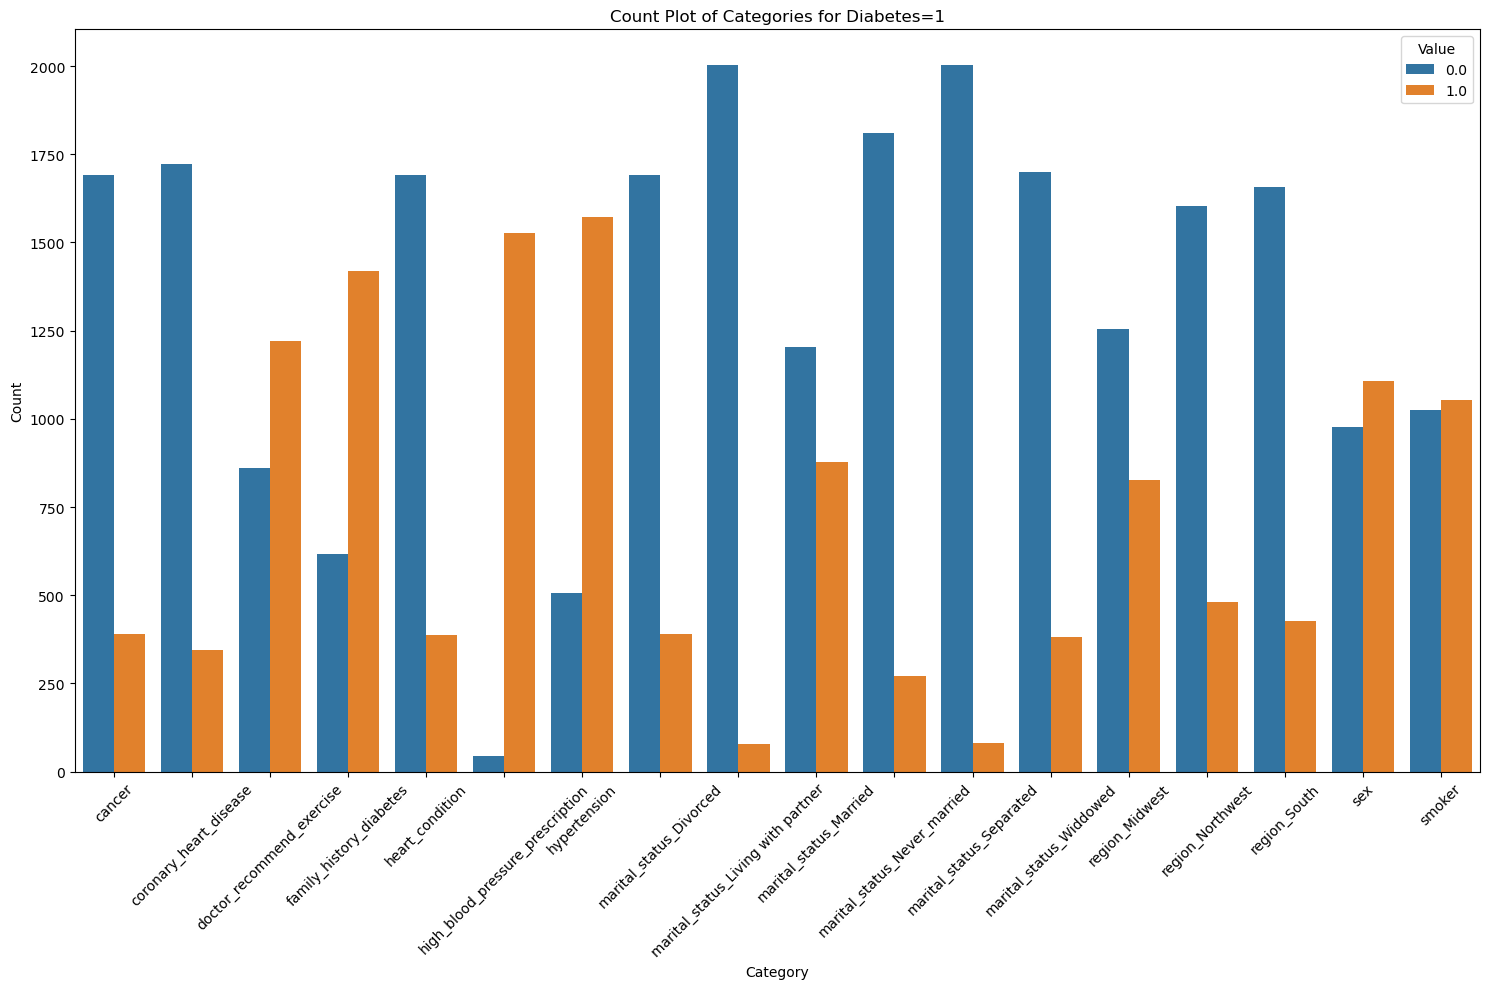

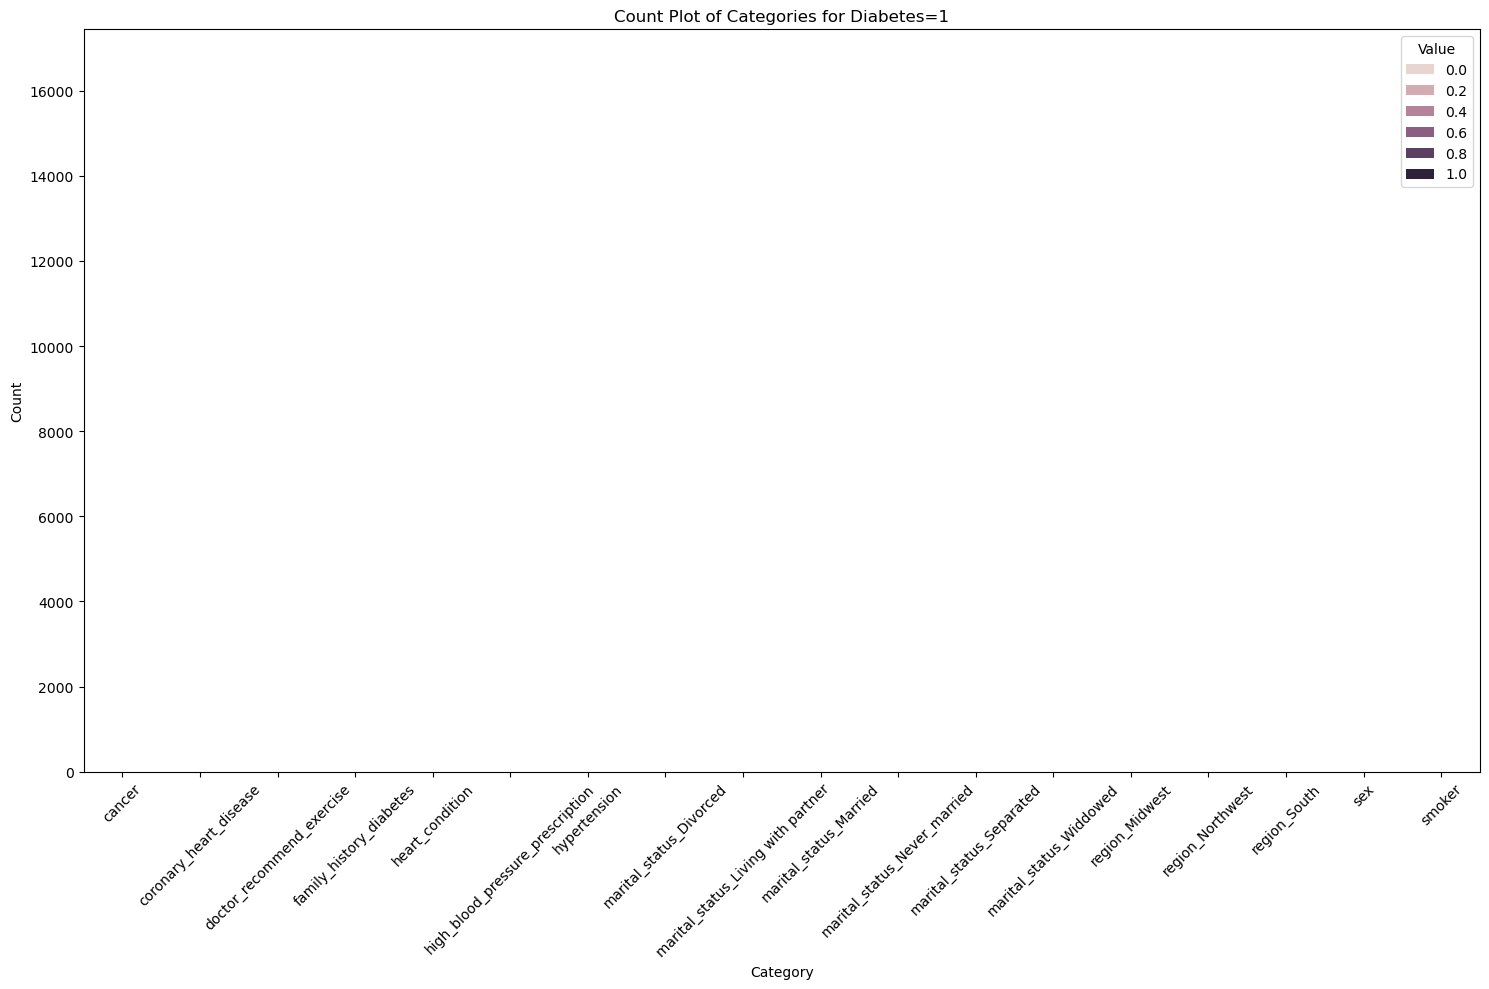

<Figure size 640x480 with 0 Axes>

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_data is already loaded and cat_columns_plot is defined
# Filter the data for diabetes=1
diabetes_1_data = train_data[train_data['diabetes'] == 1]

# Create a new DataFrame to hold the concatenated data
plot_data = pd.DataFrame()

for column in cat_columns_plot:
    temp_df = diabetes_1_data[[column]].copy()
    temp_df['Category'] = column
    temp_df.columns = ['Value', 'Category']
    plot_data = pd.concat([plot_data, temp_df], axis=0)

# Create the plot
plt.figure(figsize=(15, 10))
sns.countplot(data=plot_data, x='Category', hue='Value')
plt.title('Count Plot of Categories for Diabetes=1')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Value')
xticks = plt.xticks(rotation=45)
#plt.ylim(0, 2500)
plt.tight_layout()
plt.show()
plt.savefig('categorical_plots_diabetes_1.png')



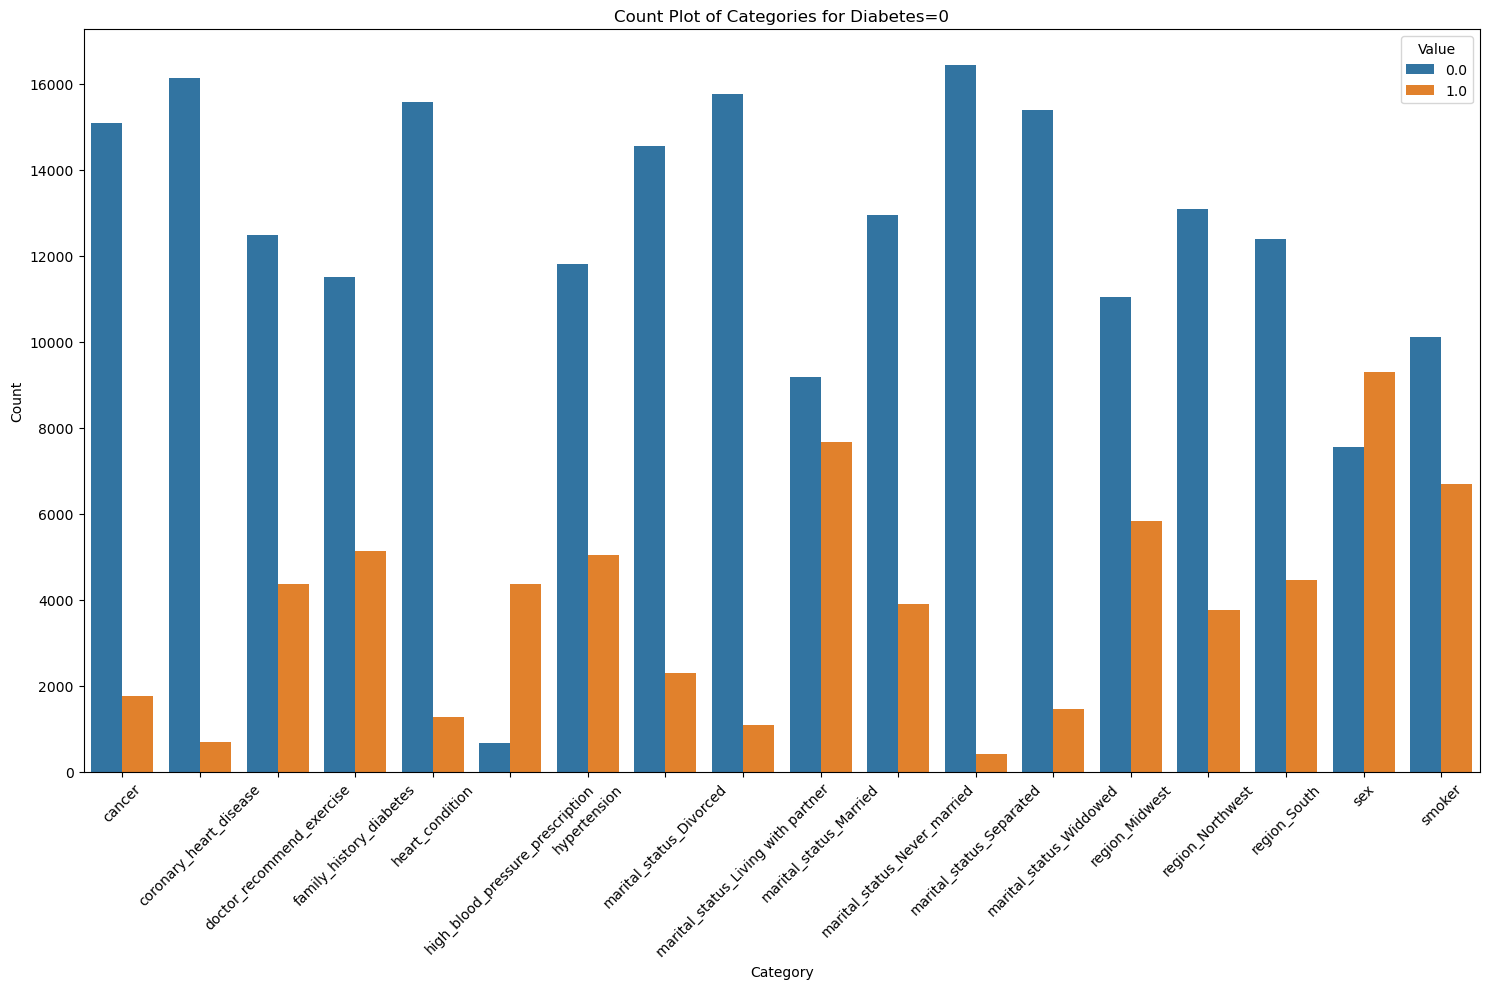

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_data is already loaded and cat_columns_plot is defined
# Filter the data for diabetes=1
diabetes_1_data = train_data[train_data['diabetes'] == 0]

# Create a new DataFrame to hold the concatenated data
plot_data = pd.DataFrame()

for column in cat_columns_plot:
    temp_df = diabetes_1_data[[column]].copy()
    temp_df['Category'] = column
    temp_df.columns = ['Value', 'Category']
    plot_data = pd.concat([plot_data, temp_df], axis=0)

# Create the plot
plt.figure(figsize=(15, 10))
sns.countplot(data=plot_data, x='Category', hue='Value')
plt.title('Count Plot of Categories for Diabetes=0')
plt.xlabel('Category')
plt.ylabel('Count')
plt.legend(title='Value')
xticks = plt.xticks(rotation=45)
#plt.ylim(0, 20000)
plt.tight_layout()
plt.show()
plt.savefig('categorical_plots_diabetes_0.png')


In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is already loaded and cat_columns_plot is defined
# Create a new DataFrame to hold the percentage data
percentage_data = pd.DataFrame()

for column in cat_columns_plot:
    # Calculate the percentage of people with diabetes=1 and diabetes=0 for each category
    temp_df = train_data.groupby([column, 'diabetes']).size().reset_index(name='Count')
    total_counts = train_data.groupby(column).size().reset_index(name='Total')
    temp_df = temp_df.merge(total_counts, on=column)
    temp_df['Percentage'] = (temp_df['Count'] / temp_df['Total']) * 100
    temp_df['Category'] = column
    temp_df['Value'] = temp_df[column]  # Add the Value column
    percentage_data = pd.concat([percentage_data, temp_df], axis=0)

# Filter the data for category=1 and diabetes=1
percentage_data_1_1 = percentage_data[(percentage_data['diabetes'] == 1)]

# Filter the data for category=0 and diabetes=0
percentage_data_0_0 = percentage_data[(percentage_data['diabetes'] == 0)]

# Reset index to ensure unique labels
percentage_data_1_1 = percentage_data_1_1.reset_index(drop=True)
percentage_data_0_0 = percentage_data_0_0.reset_index(drop=True)

# Print out the percentages for category=1 and diabetes=1
print("Percentages for category=1 and diabetes=1:")
print(percentage_data_1_1[['Category', 'Percentage']])

# Print out the percentages for category=0 and diabetes=0
print("Percentages for category=0 and diabetes=0:")
print(percentage_data_0_0[['Category', 'Percentage']])

# Combine the data for plotting
combined_data = pd.concat([percentage_data_1_1, percentage_data_0_0])

# Create the plot comparing category=1 and diabetes=1 versus category=0 and diabetes=0
plt.figure(figsize=(15, 10))
sns.barplot(data=percentage_data_1_1, x='Category', y='Percentage' , hue='Value')
plt.title('Percentage of Diabetes=1')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
#plt.ylim(0, 100)  # Set y-axis range from 0 to 100
plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
sns.barplot(data=percentage_data_0_0, x='Category', y='Percentage', hue='Value')
plt.title('Percentage of Diabetes=0')
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
#plt.ylim(0, 100)  # Set y-axis range from 0 to 100
plt.tight_layout()
plt.show()

Percentages for category=1 and diabetes=1:
      Category  Percentage
0       cancer   43.152936
1       cancer  100.000000
2       cancer  100.000000
3       cancer  100.000000
4       cancer  100.000000
...        ...         ...
89428   smoker  100.000000
89429   smoker  100.000000
89430   smoker  100.000000
89431   smoker  100.000000
89432   smoker   41.748063

[89433 rows x 2 columns]
Percentages for category=0 and diabetes=0:
                              Category  Percentage
0                               cancer   56.847064
1                               cancer   64.319080
2               coronary_heart_disease   56.980925
3               coronary_heart_disease   48.777174
4            doctor_recommend_exercise   77.868550
5            doctor_recommend_exercise   42.634600
6              family_history_diabetes   84.643367
7              family_history_diabetes   38.515504
8                      heart_condition   57.254636
9                      heart_condition   58.013937
10 

C:\Users\15184\AppData\Local\Temp\ipykernel_22264\429484783.py:48: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\15184\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


KeyboardInterrupt: 

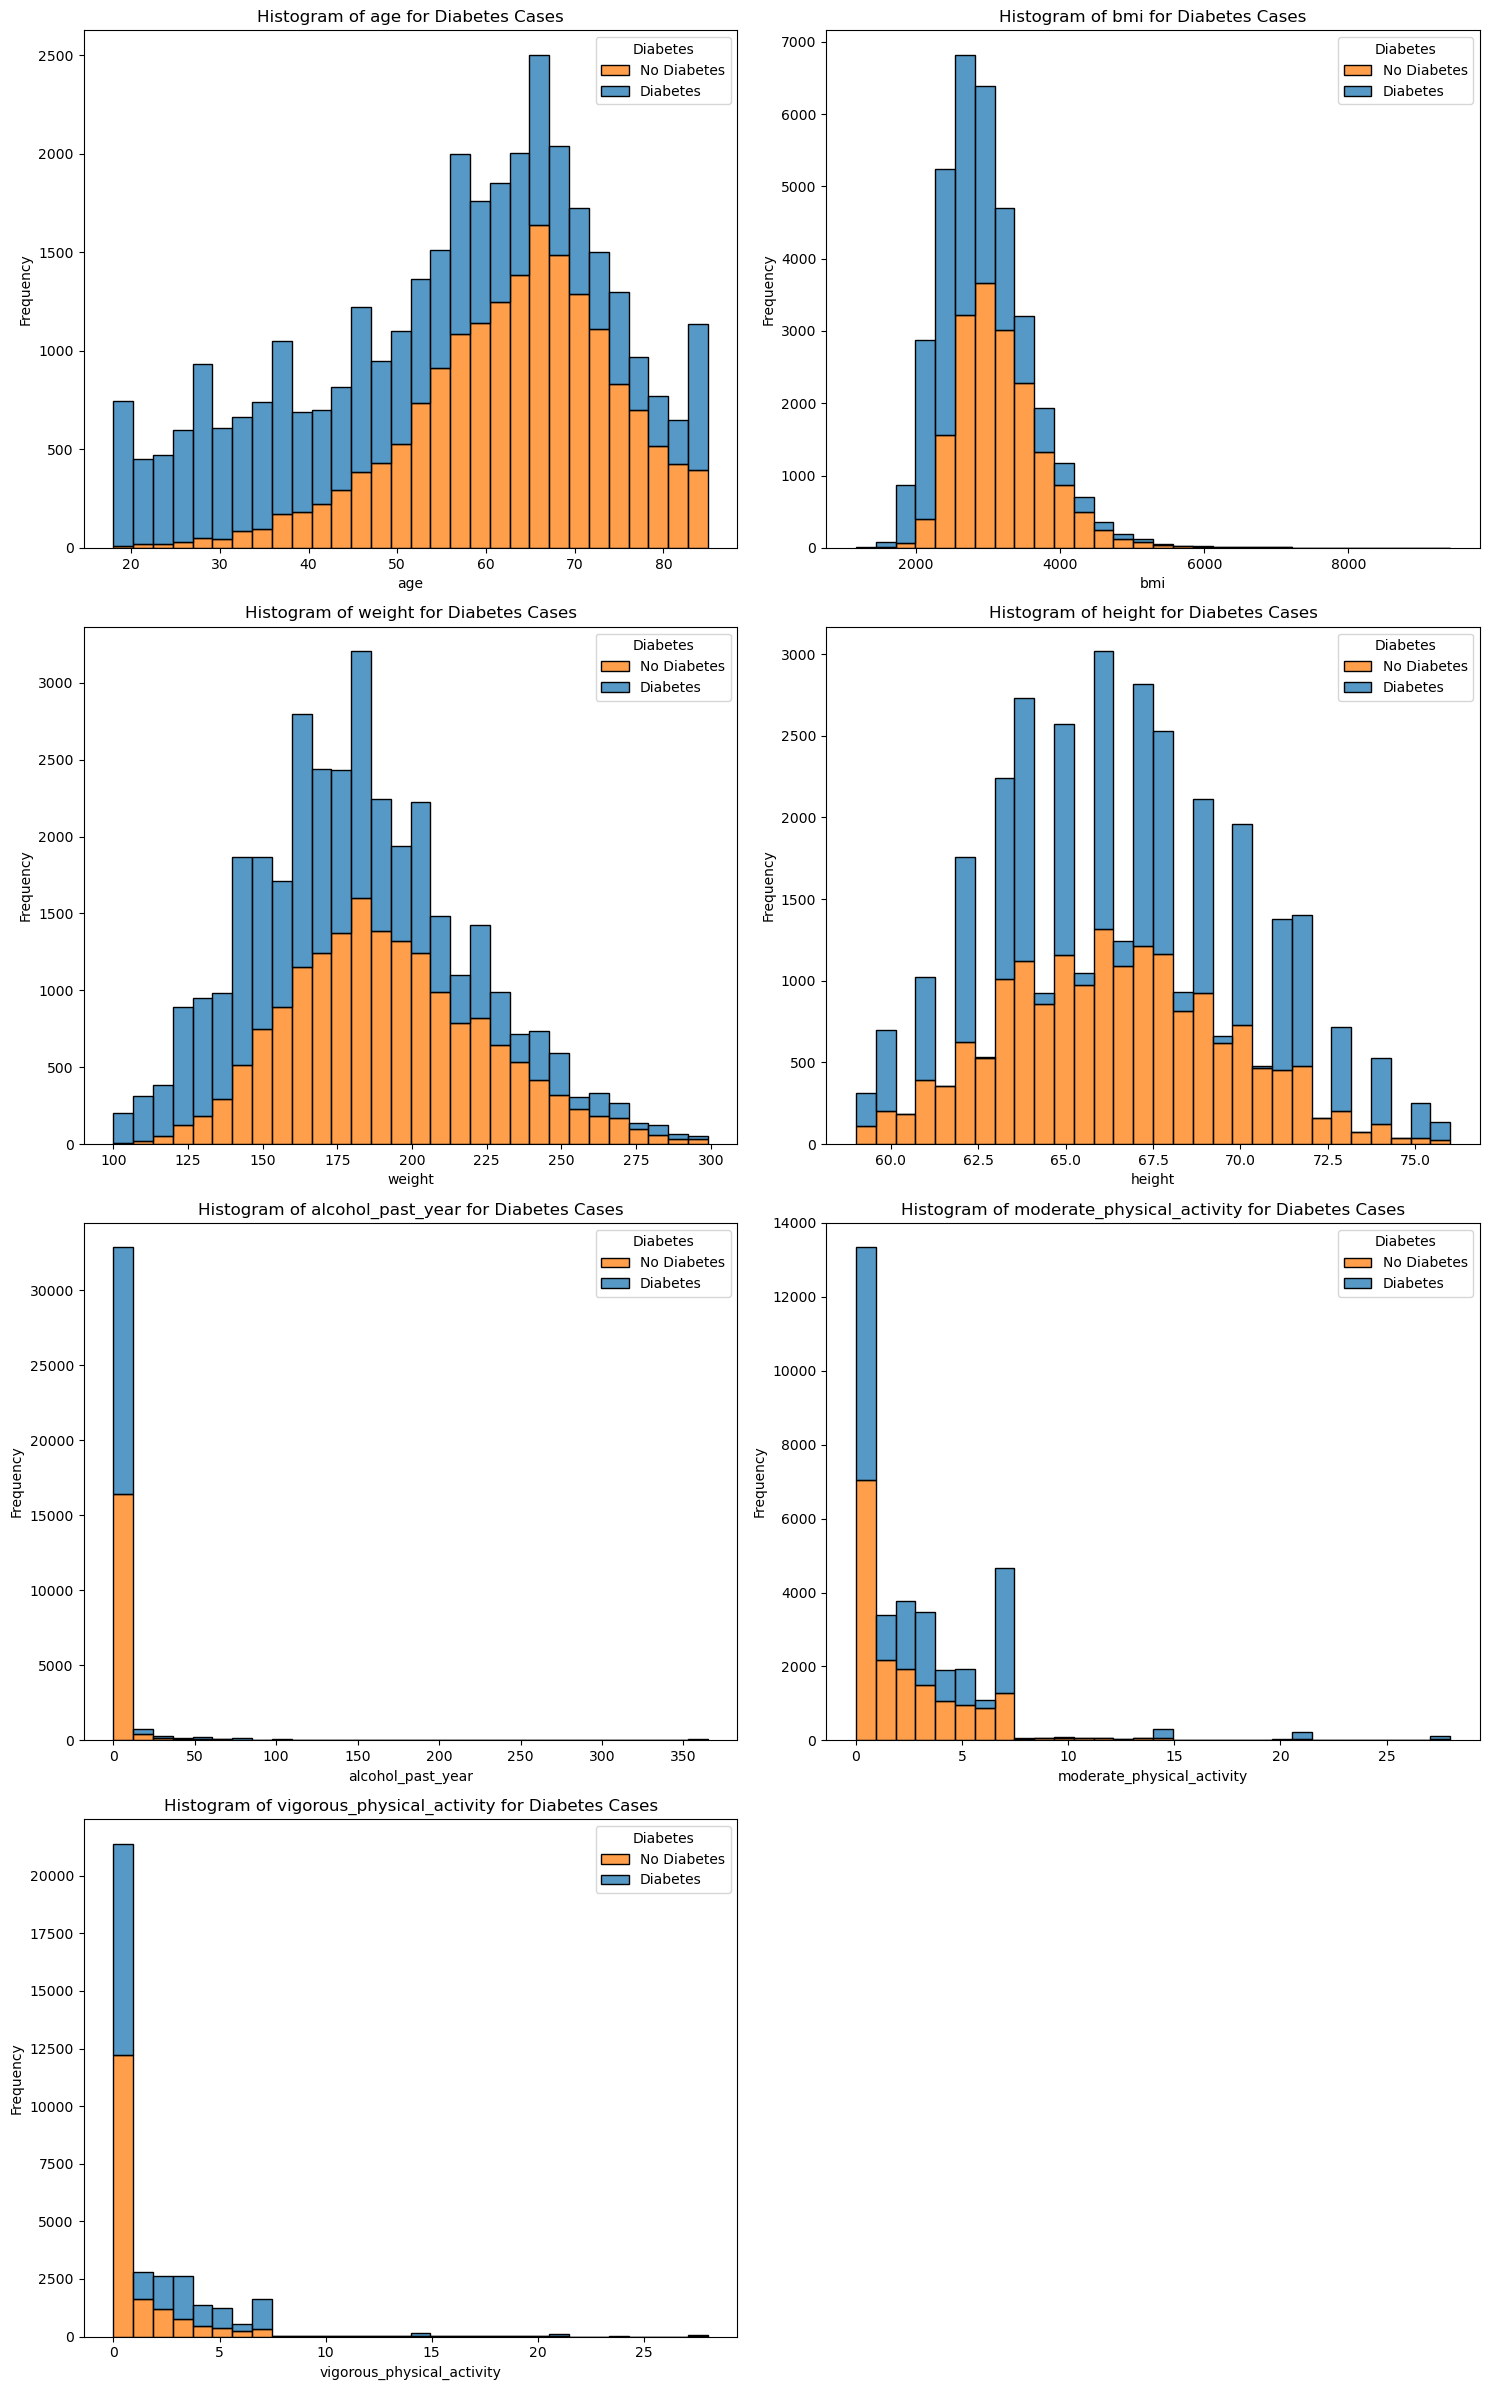

<Figure size 640x480 with 0 Axes>

In [13]:
# Define the number of columns per row
cols_per_row = 2
num_cols = len(continuous_columns)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create a figure with subplots for continuous columns
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax, column in zip(axes, continuous_columns):
    sns.histplot(data=train_data, x=column, bins=30, hue='diabetes', multiple='stack', kde=False, ax=ax)
    ax.set_title(f'Histogram of {column} for Diabetes Cases')
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.legend(title='Diabetes', labels=['No Diabetes', 'Diabetes'])

# Hide any unused subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
plt.savefig('continuous_plots.png')

C:\Users\15184\AppData\Local\Temp\ipykernel_22264\3495064088.py:31: RuntimeWarning: invalid value encountered in divide
  percentage_with_diabetes = (counts_with_diabetes / counts) * 100
C:\Users\15184\AppData\Local\Temp\ipykernel_22264\3495064088.py:32: RuntimeWarning: invalid value encountered in divide
  percentage_without_diabetes = (counts_without_diabetes / counts) * 100


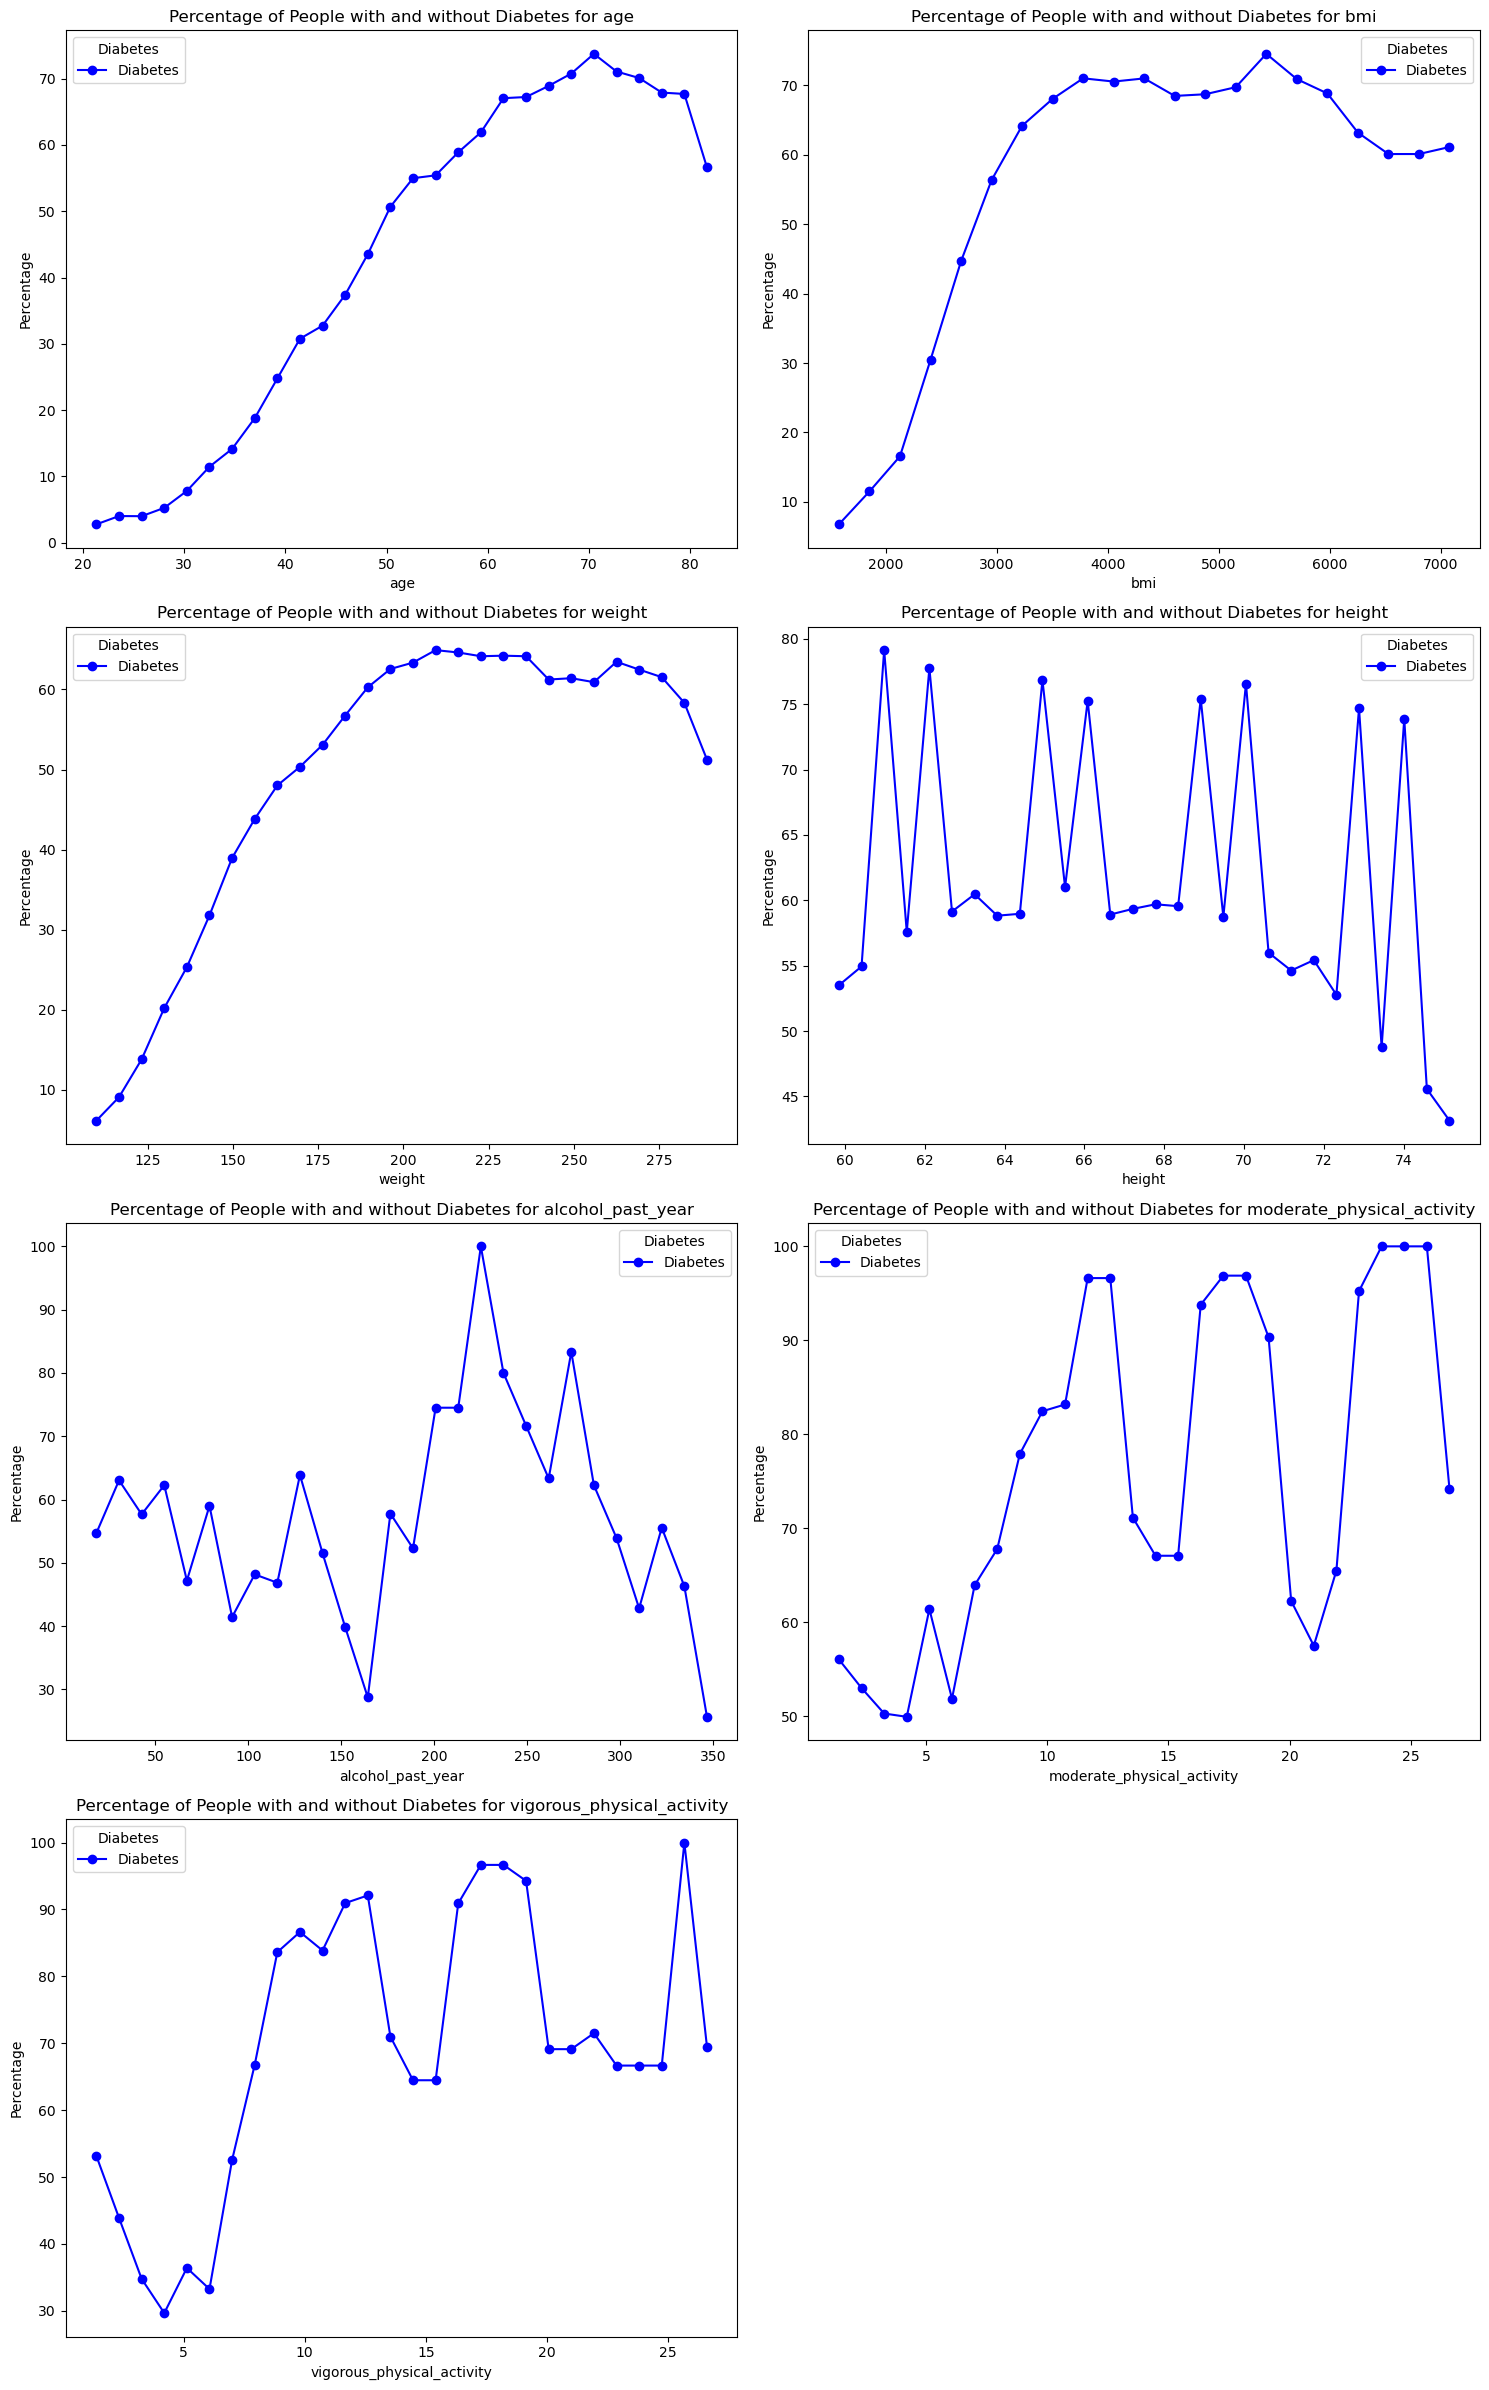

<Figure size 640x480 with 0 Axes>

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming train_data and continuous_columns are already defined
# Define the number of columns per row
cols_per_row = 2
num_cols = len(continuous_columns)
num_rows = (num_cols + cols_per_row - 1) // cols_per_row  # Calculate the number of rows needed

# Create a figure with subplots for continuous columns
fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(15, 6 * num_rows))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for ax, column in zip(axes, continuous_columns):
    # Calculate the bin edges and counts for each bin
    bin_edges = np.histogram_bin_edges(train_data[column], bins=30)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    
    # Calculate the counts for each bin
    counts, _ = np.histogram(train_data[column], bins=bin_edges)
    
    # Calculate the counts for each bin for people with and without diabetes
    counts_with_diabetes, _ = np.histogram(train_data[train_data['diabetes'] == 1][column], bins=bin_edges)
    counts_without_diabetes, _ = np.histogram(train_data[train_data['diabetes'] == 0][column], bins=bin_edges)
    
    # Calculate the percentage of people with and without diabetes within each bin
    percentage_with_diabetes = (counts_with_diabetes / counts) * 100
    percentage_without_diabetes = (counts_without_diabetes / counts) * 100
    
    # Smooth the curves using a rolling average
    window_size = 3  # Adjust the window size as needed
    percentage_with_diabetes_smooth = pd.Series(percentage_with_diabetes).rolling(window=window_size, center=True).mean()
    percentage_without_diabetes_smooth = pd.Series(percentage_without_diabetes).rolling(window=window_size, center=True).mean()
    
    # Plot the results
    ax.plot(bin_centers, percentage_with_diabetes_smooth, marker='o', linestyle='-', label='Diabetes', color='blue')
    #ax.plot(bin_centers, percentage_without_diabetes_smooth, marker='o', linestyle='-', label='No Diabetes', color='orange')
    
    ax.set_title(f'Percentage of People with and without Diabetes for {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Percentage')
    ax.legend(title='Diabetes')

# Hide any unused subplots
for i in range(num_cols, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
plt.savefig('continuous_plots_smoothed.png')

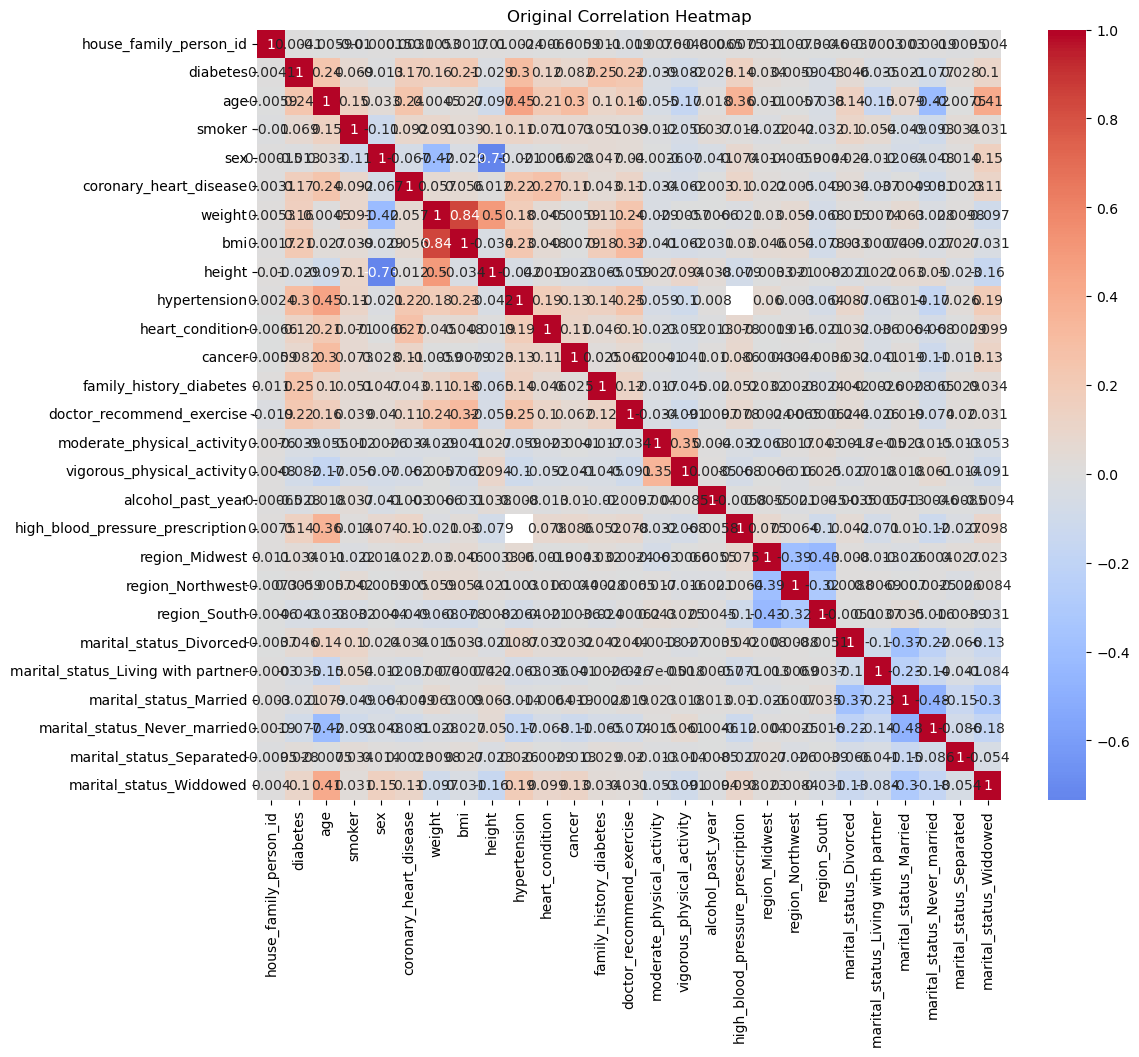

C:\Users\15184\AppData\Local\Temp\ipykernel_27040\1582610043.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[5.64360101e+08 3.57820101e+08 3.41540103e+08 ... 9.24801025e+07
 6.43640102e+08 3.49930200e+08]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[random_indices] += np.random.normal(loc=0, scale=1, size=train_data.loc[random_indices].shape)
C:\Users\15184\AppData\Local\Temp\ipykernel_27040\1582610043.py:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[64.48168146 58.73967566 54.47308123 ... 65.33585702 44.87504256
 25.4952712 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  train_data.loc[random_indices] += np.random.normal(loc=0, scale=1, size=train_data.loc[random_indices].shape)
C:\Users\15184\AppData\Local\T

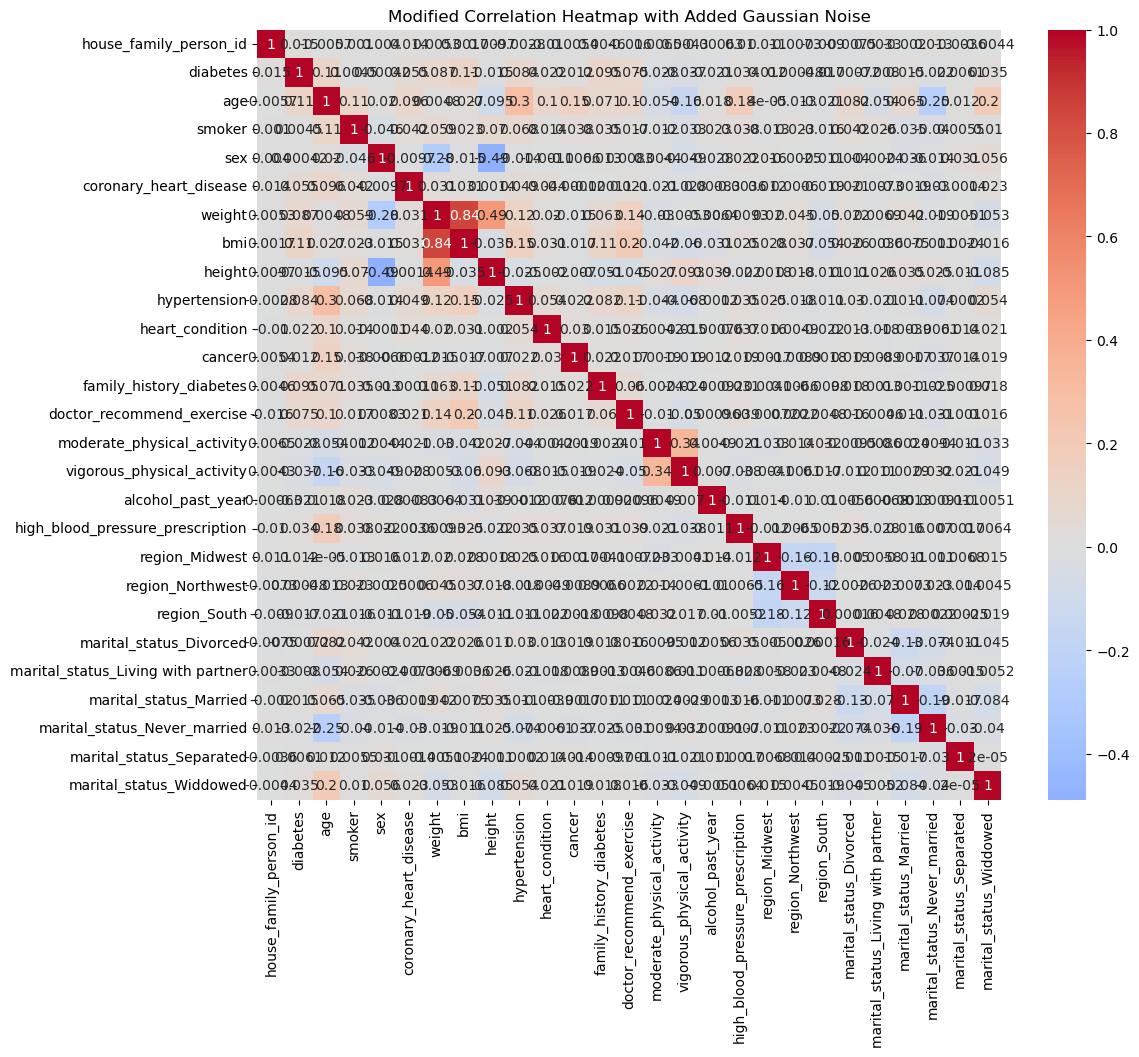

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is already loaded
# Make a copy of the original data
original_data = train_data.copy()

# Calculate the correlation matrix of the original data
original_correlation_matrix = original_data.corr()

# Plot the heatmap of the original correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(original_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Original Correlation Heatmap')
plt.show()

# Select 30 percent of the data randomly
sample_size = int(0.3 * len(train_data))
random_indices = np.random.choice(train_data.index, size=sample_size, replace=False)

# Add a random Gaussian number to the selected data
train_data.loc[random_indices] += np.random.normal(loc=0, scale=1, size=train_data.loc[random_indices].shape)

# Calculate the correlation matrix of the modified data
modified_correlation_matrix = train_data.corr()

# Plot the heatmap of the modified correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(modified_correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Modified Correlation Heatmap with Added Gaussian Noise')
plt.show()

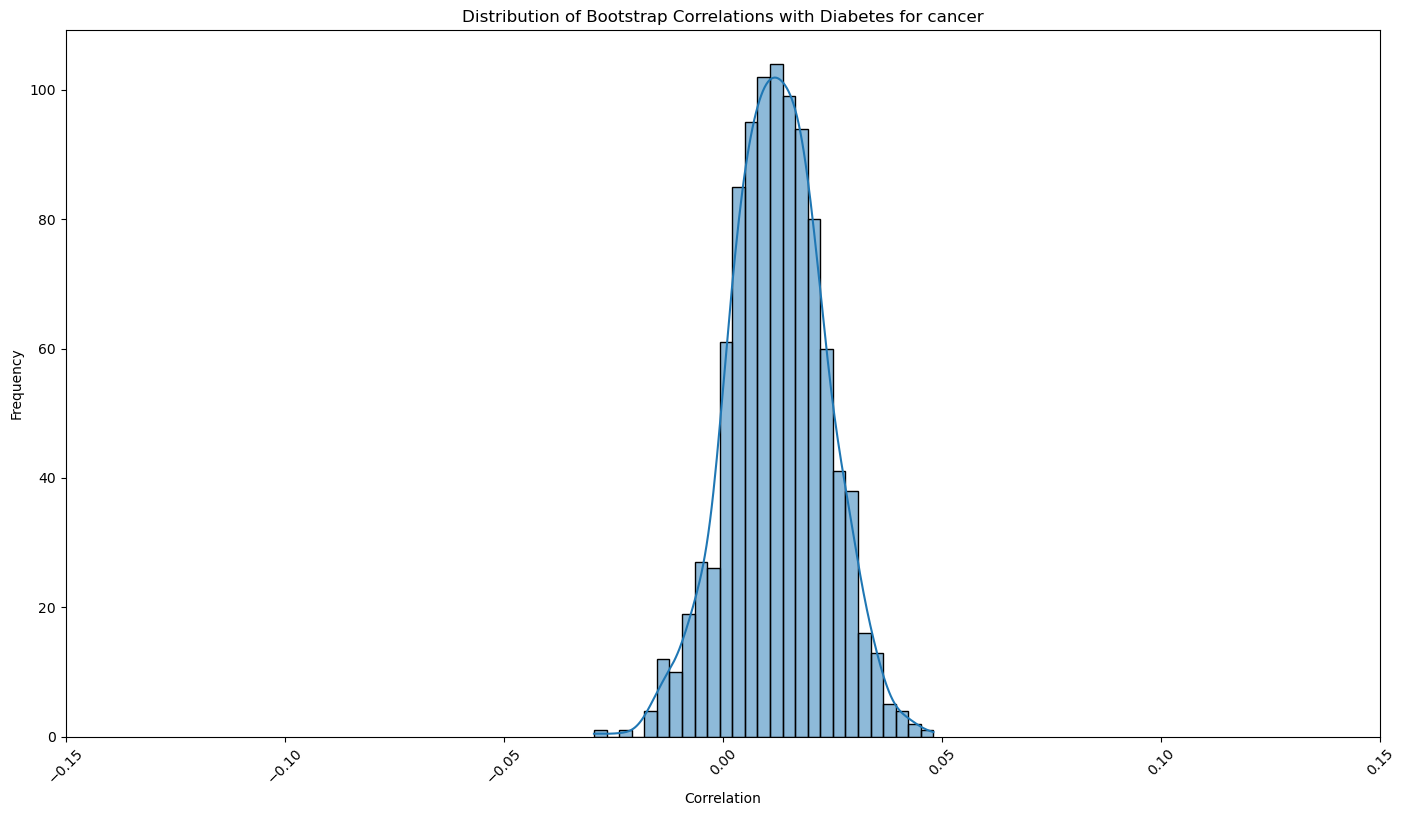

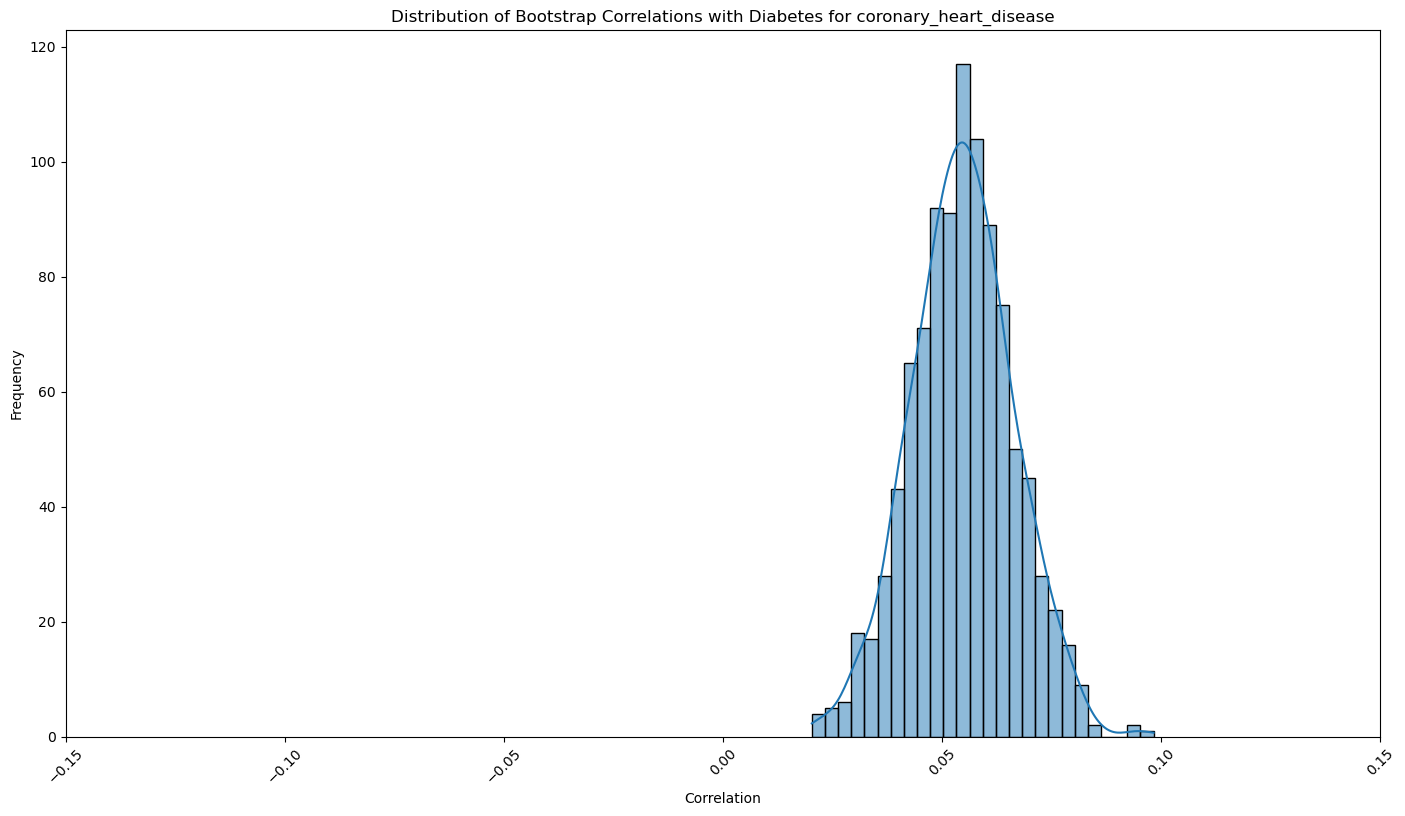

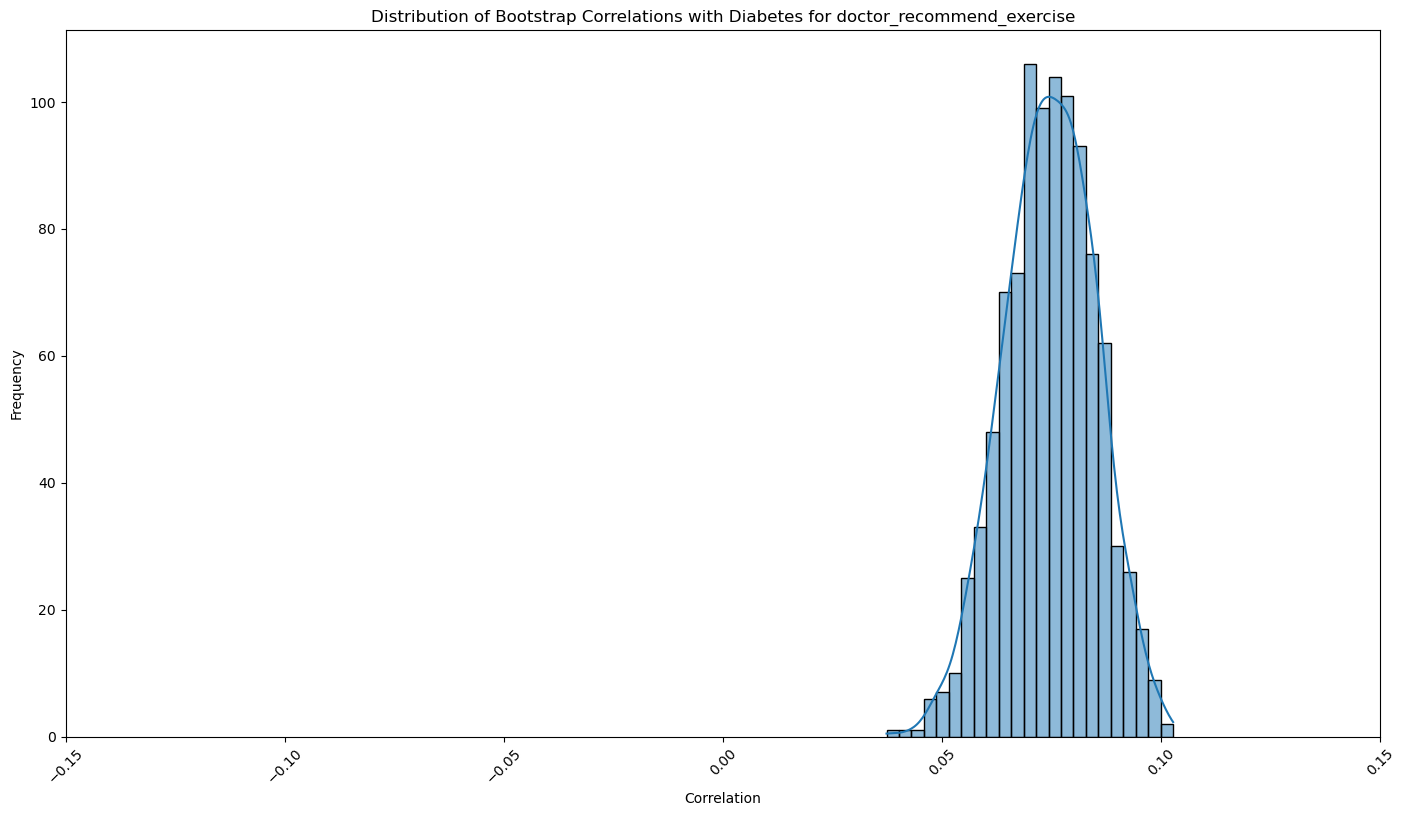

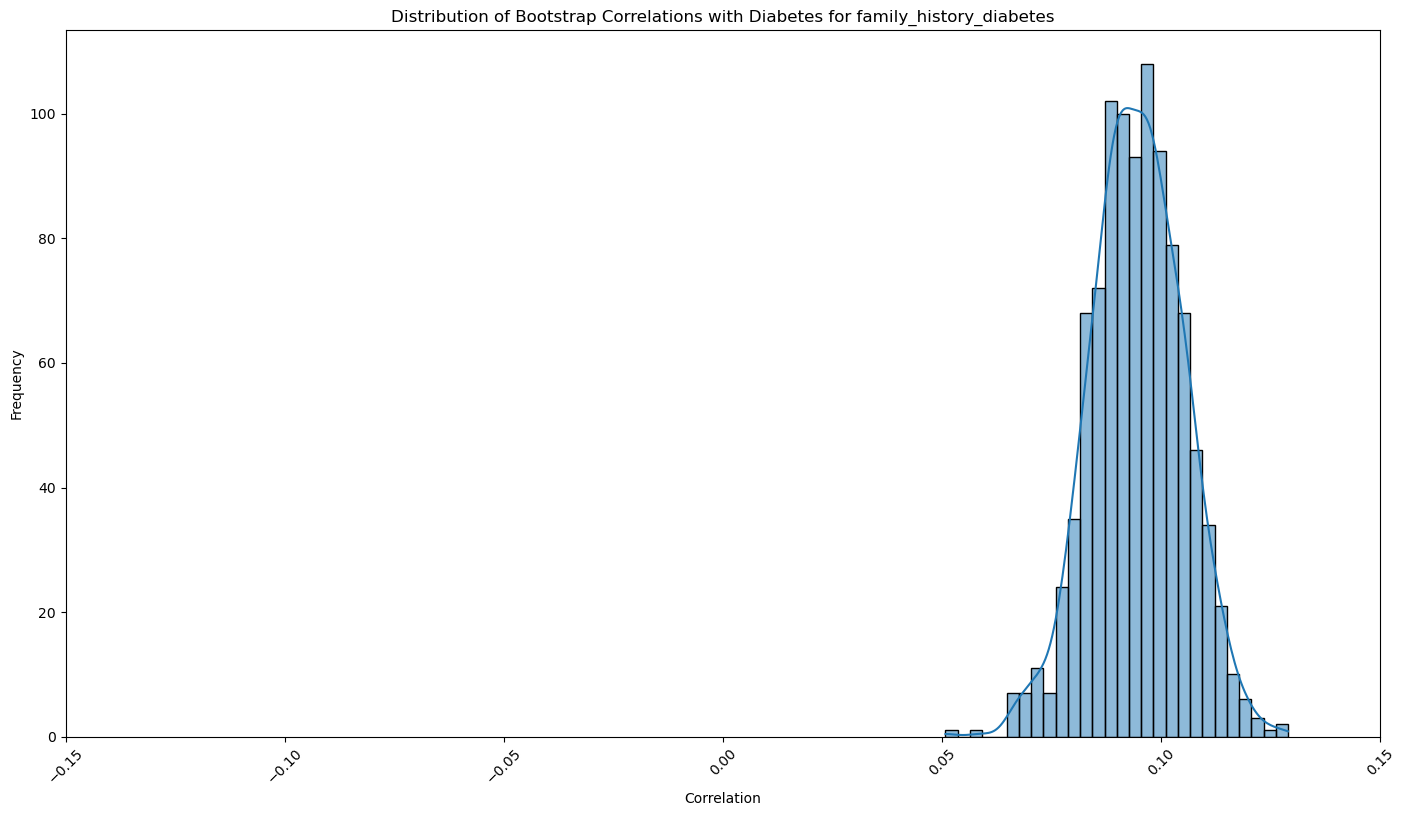

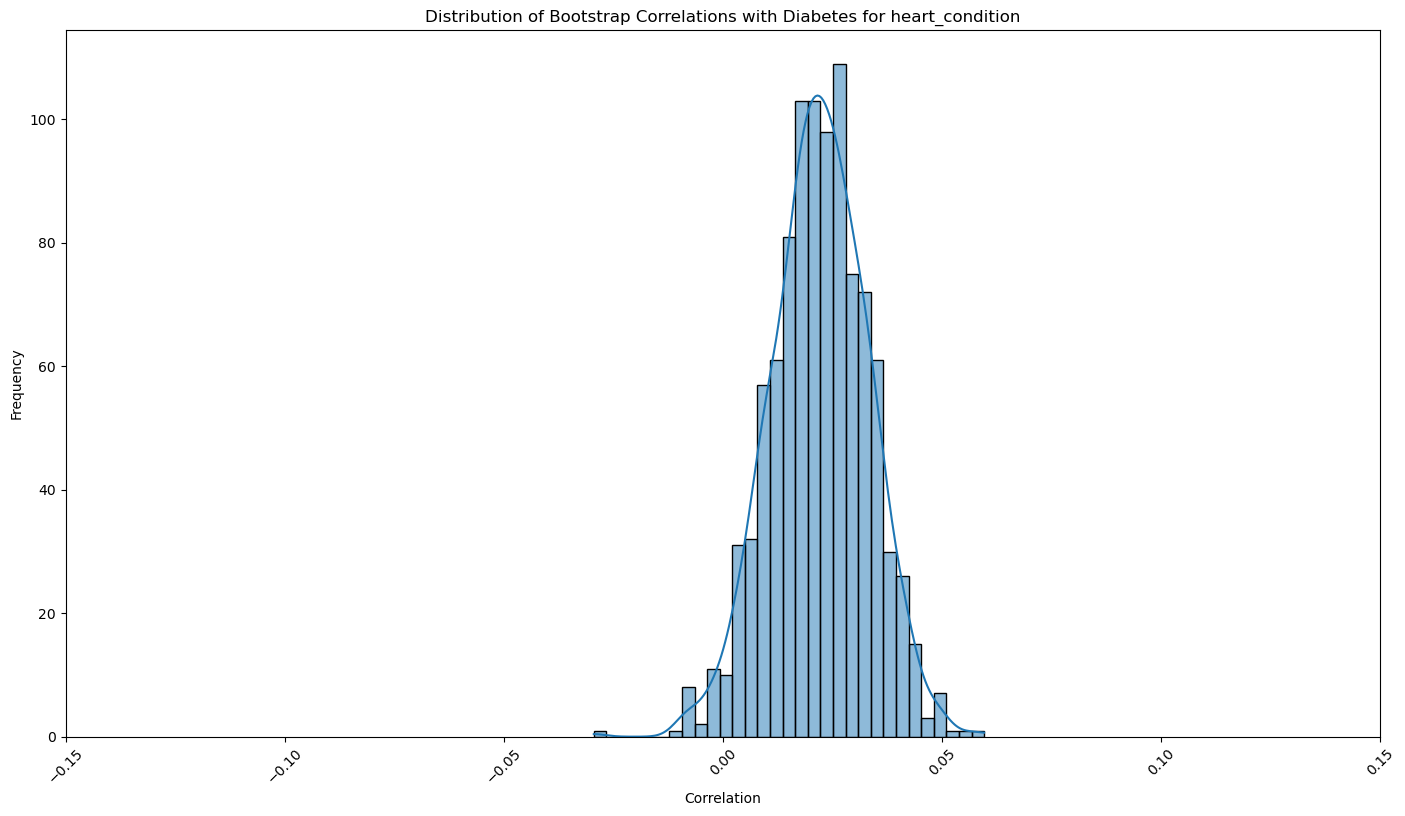

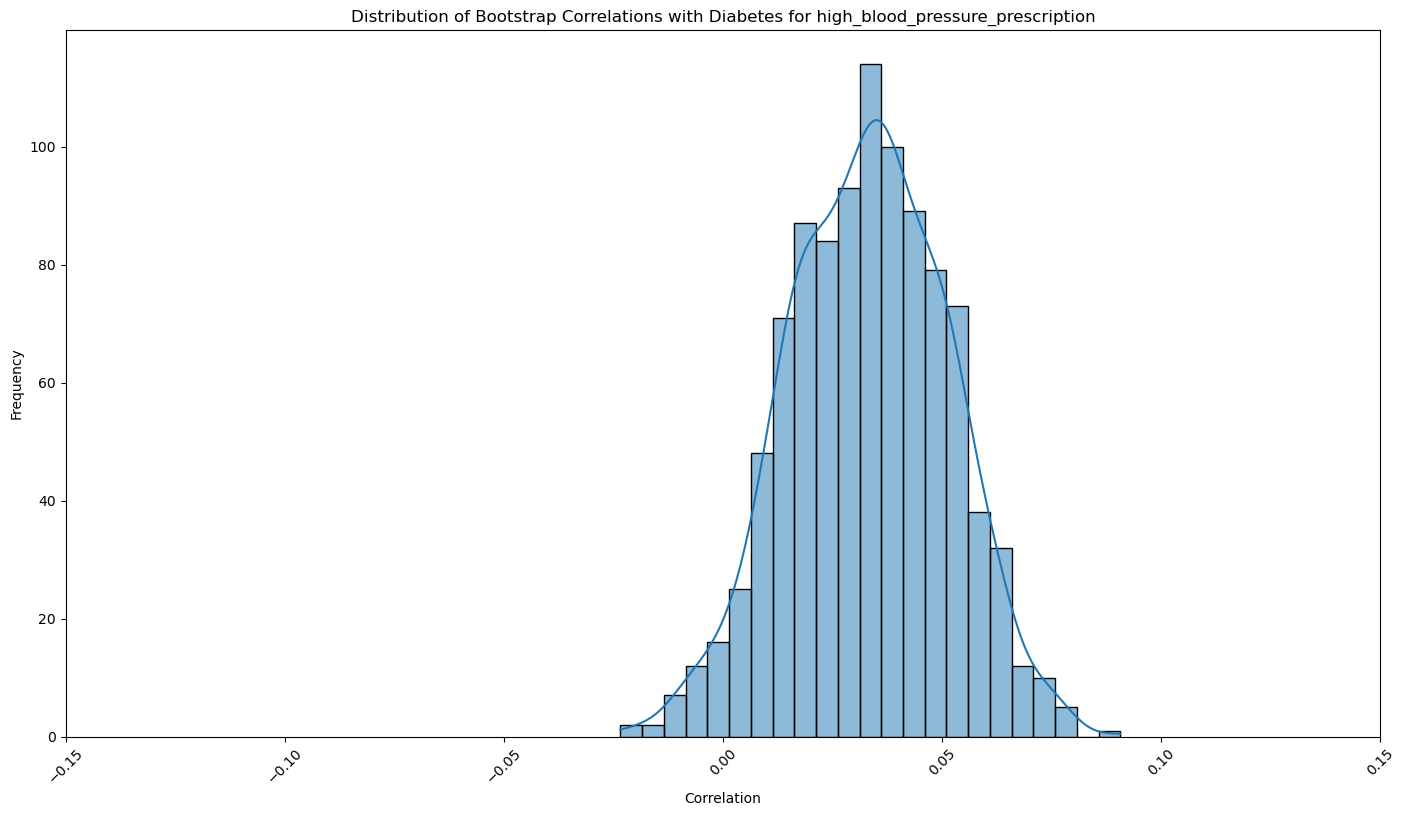

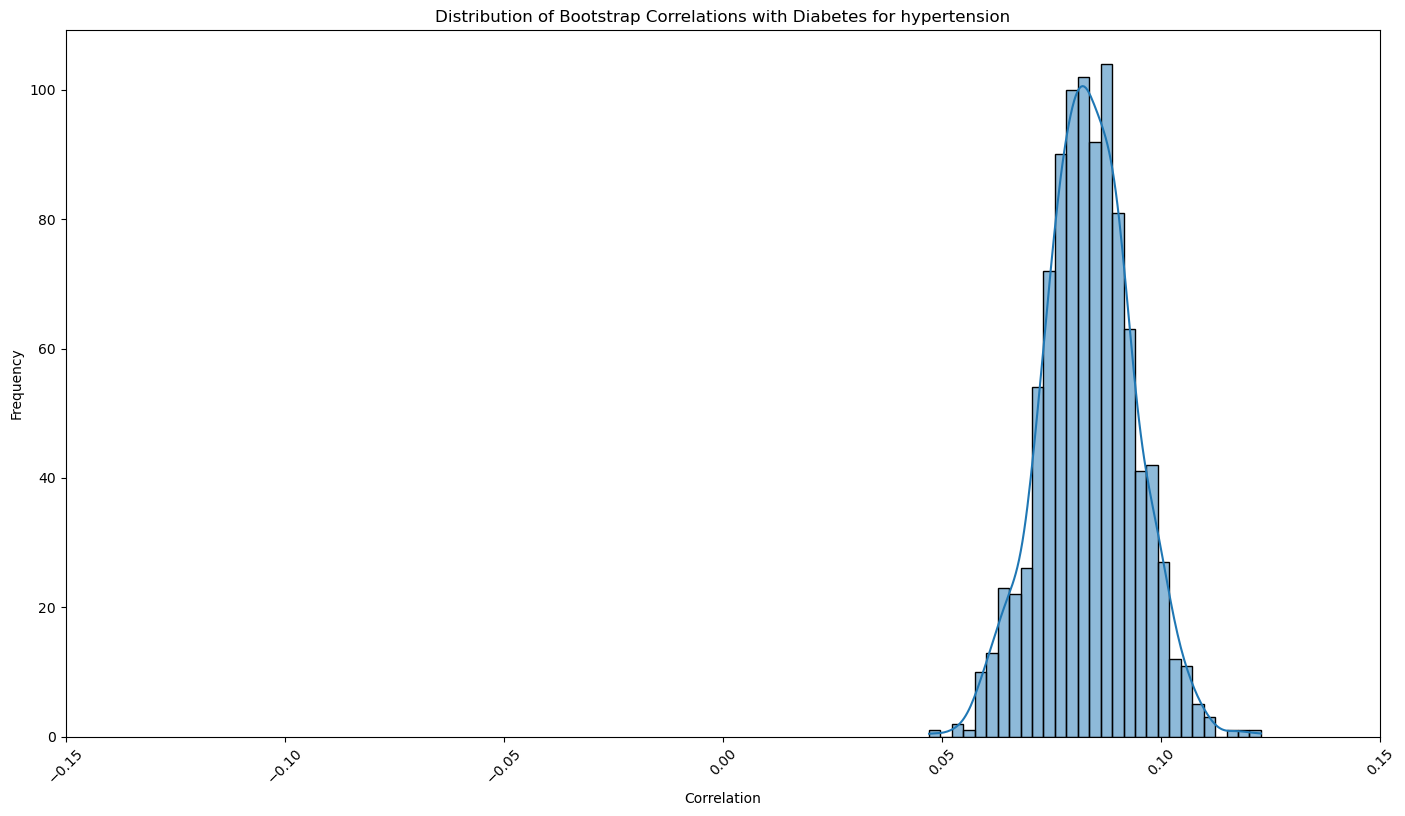

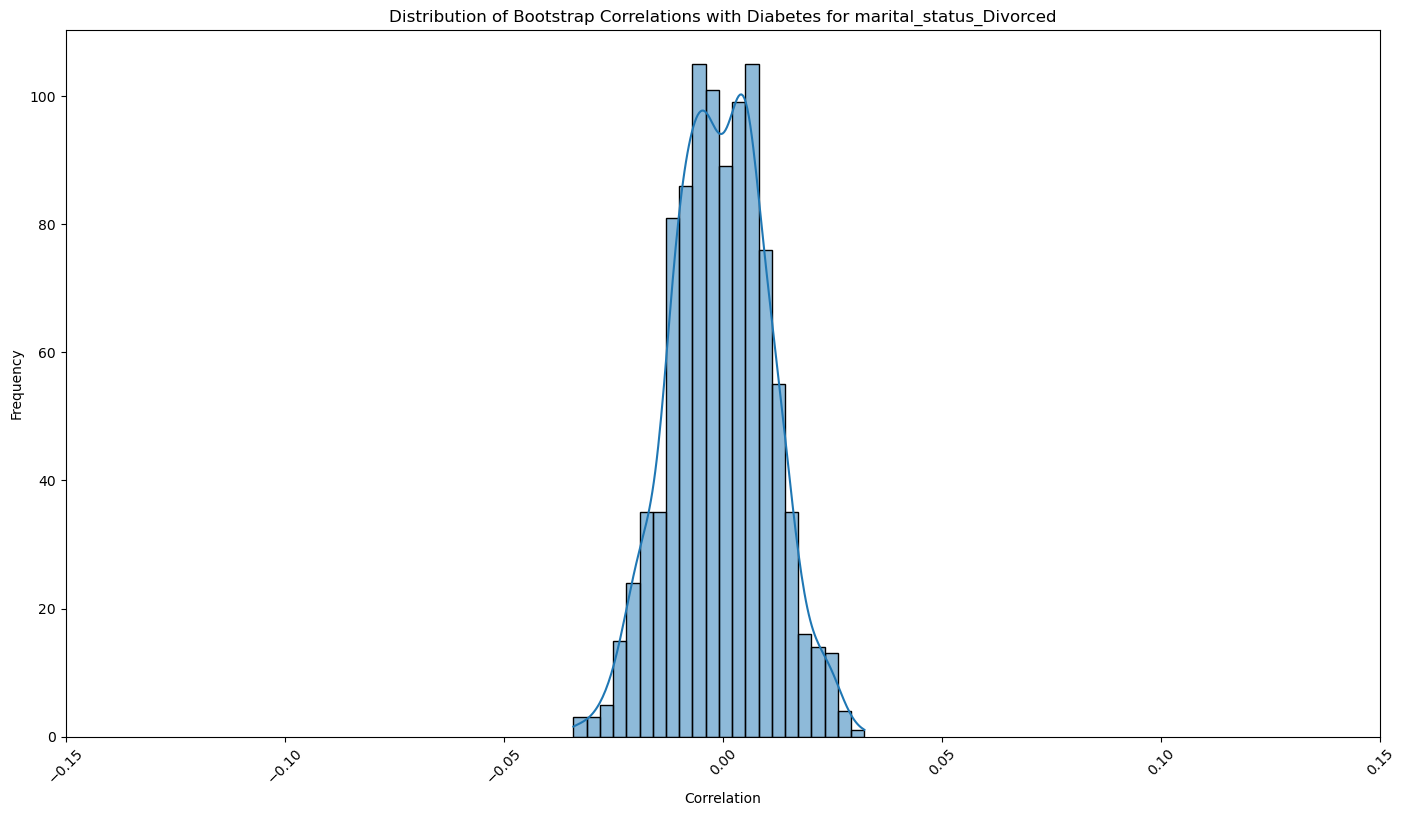

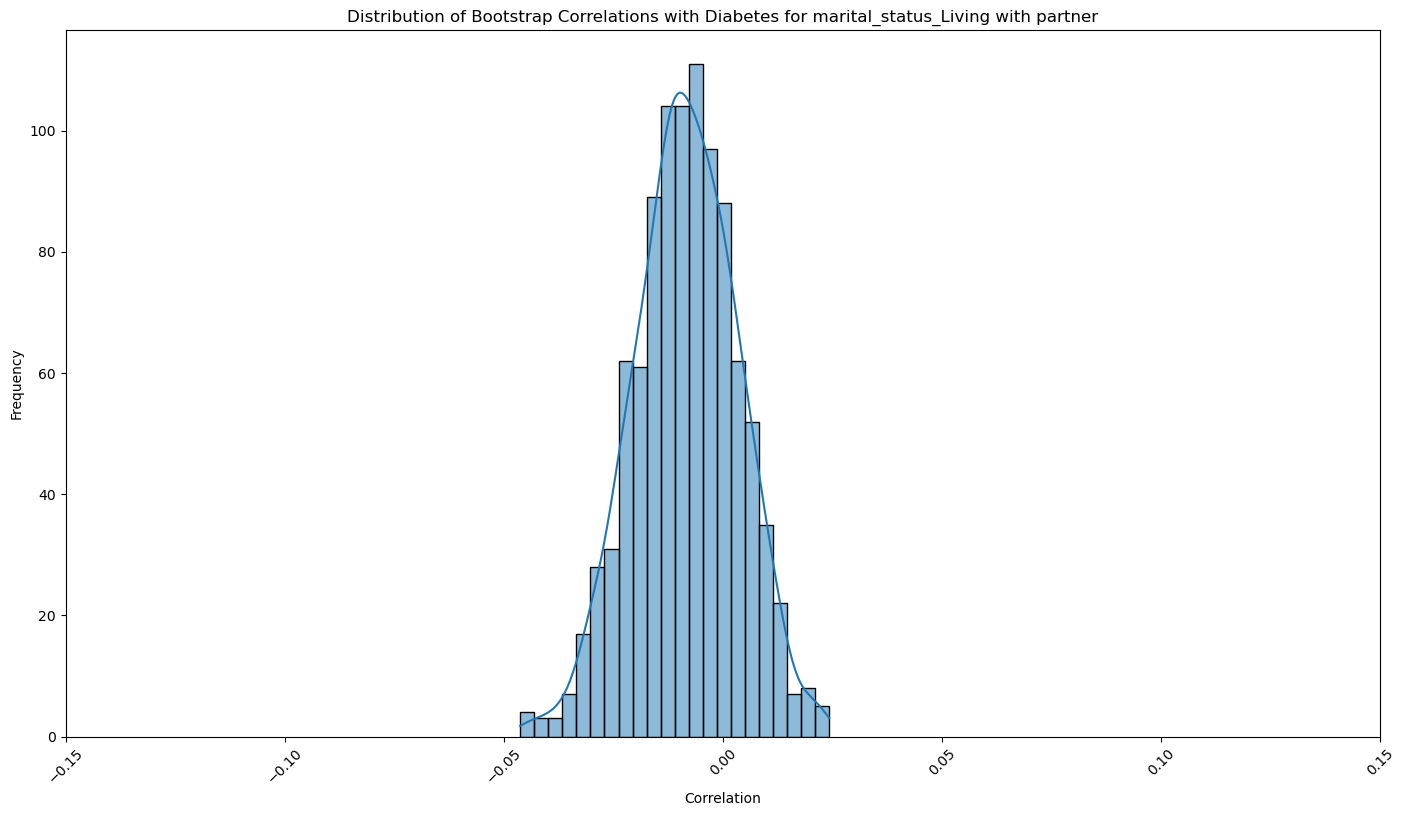

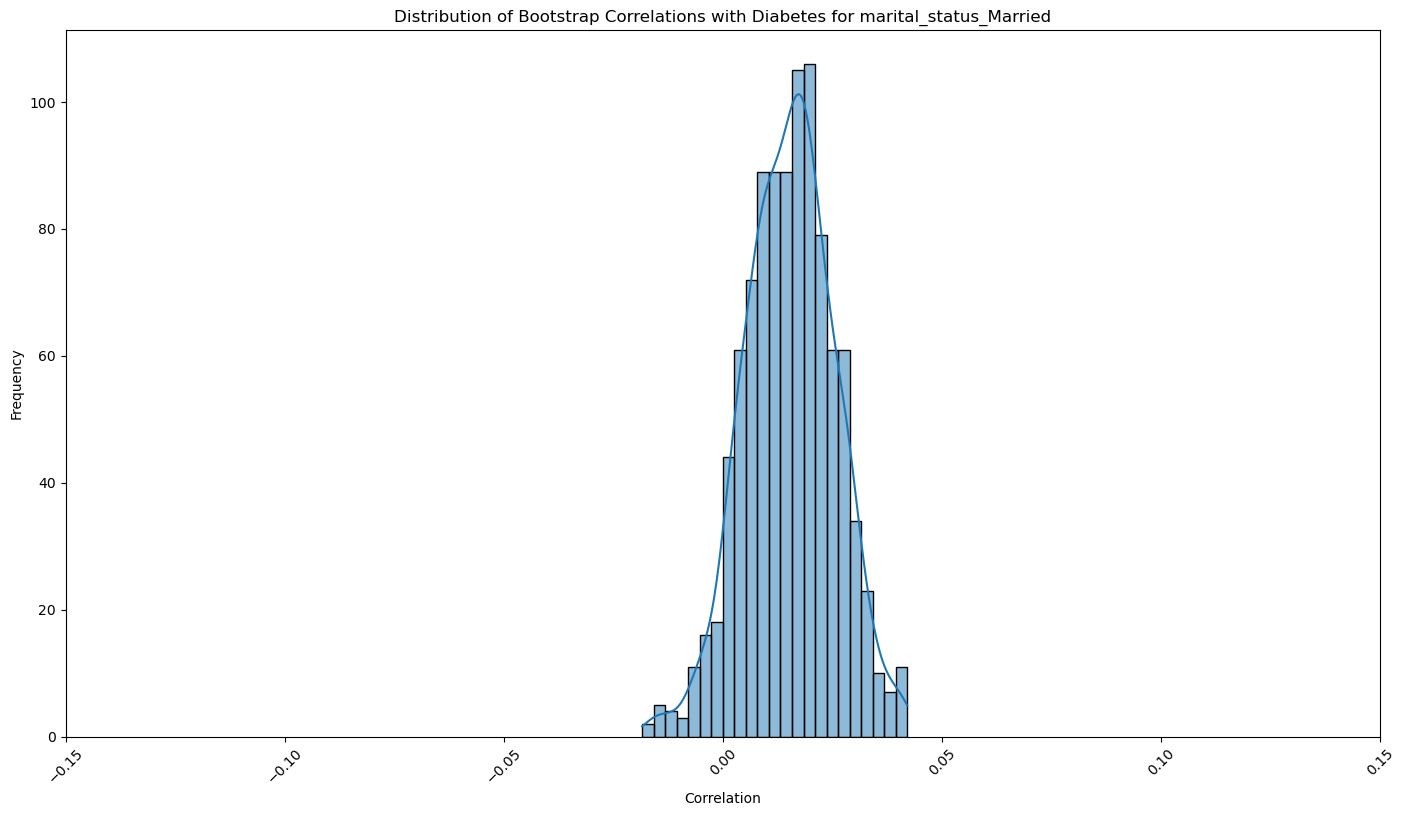

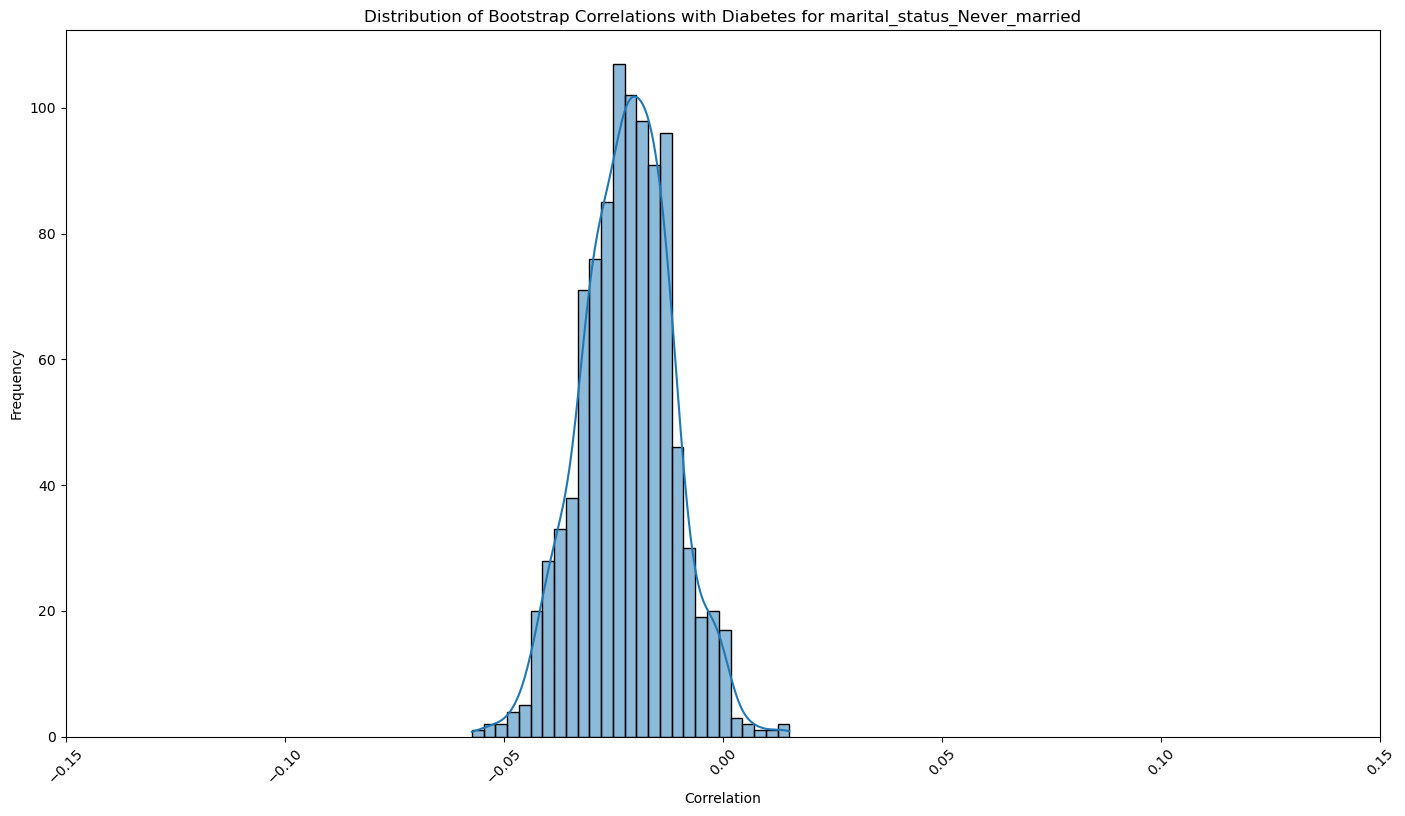

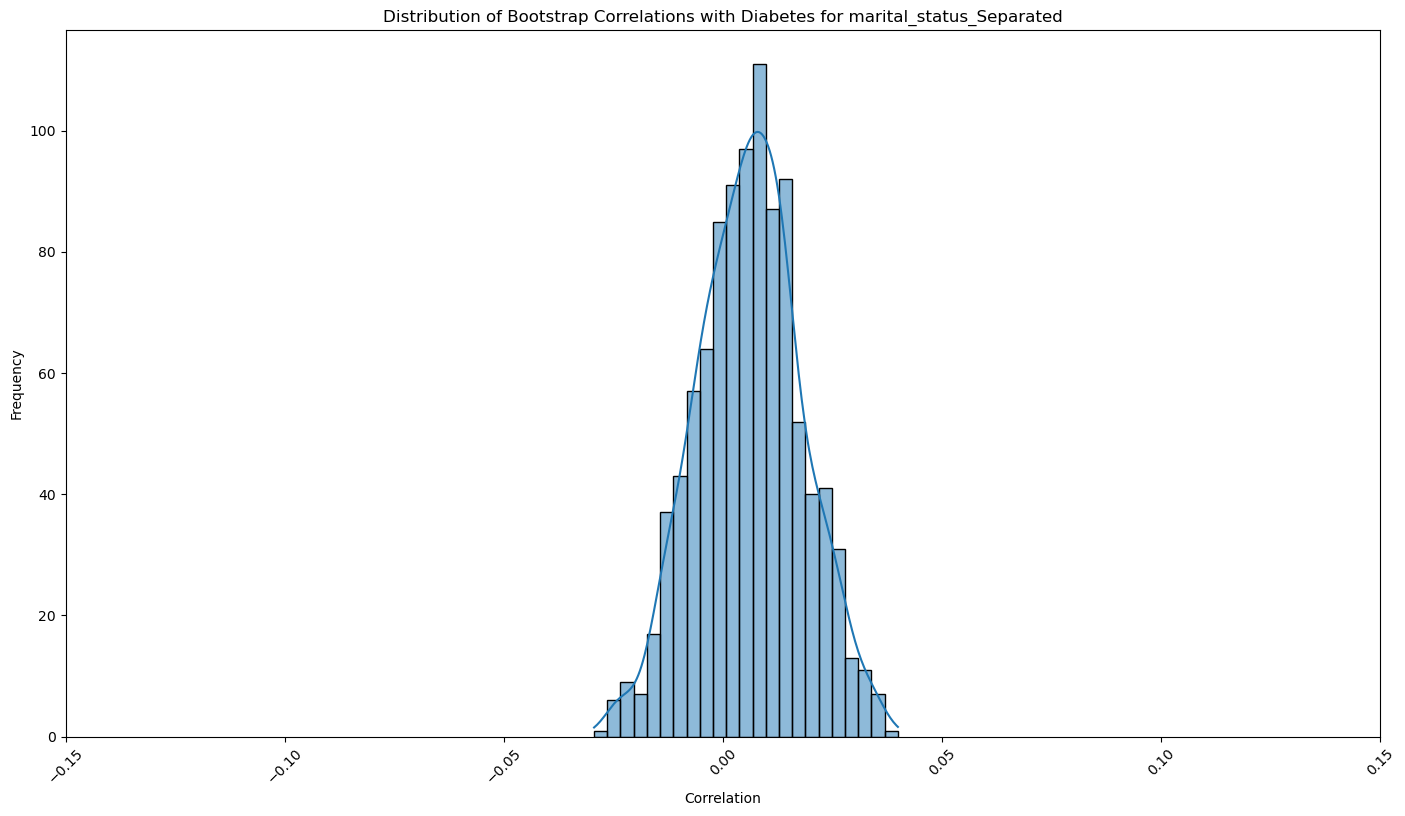

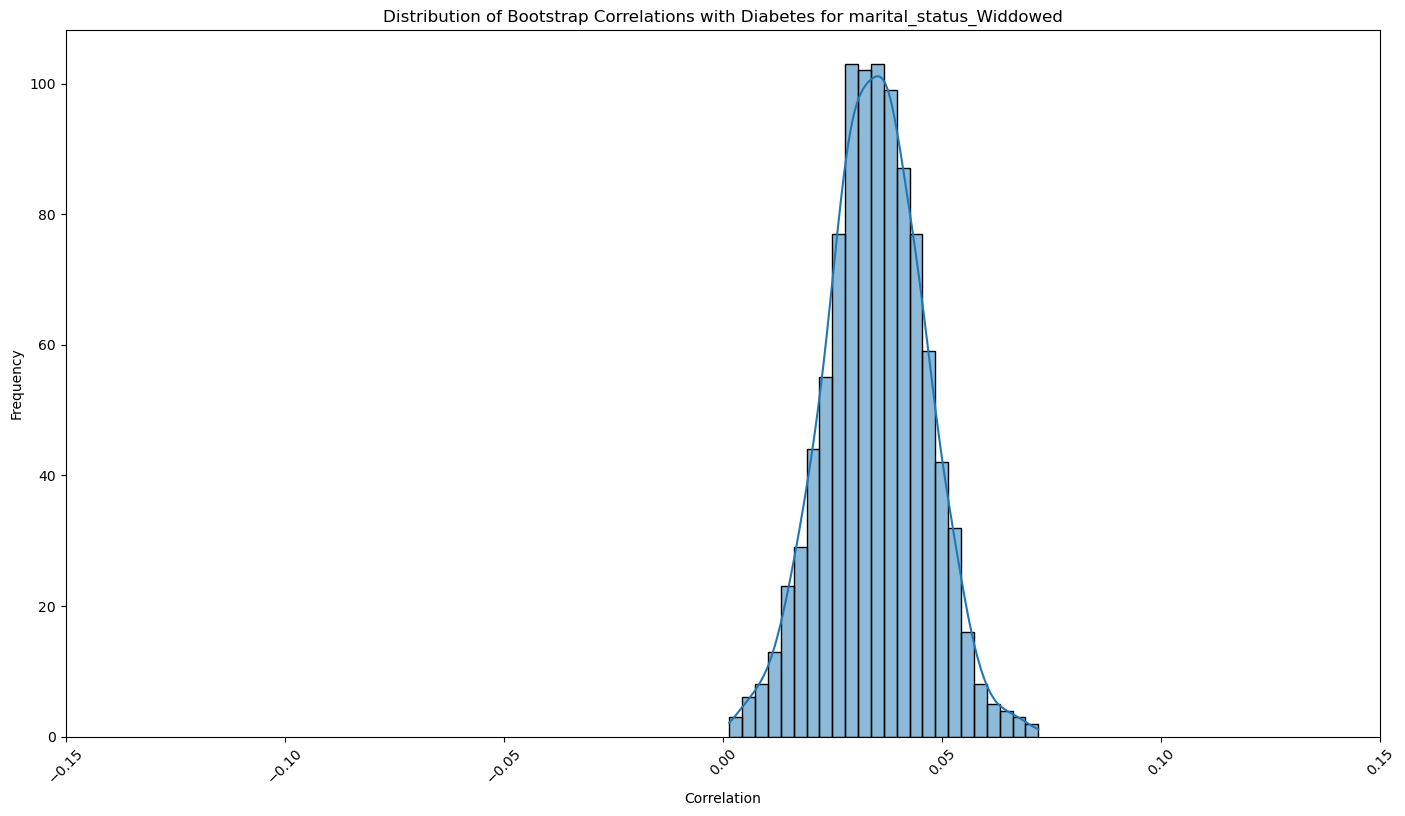

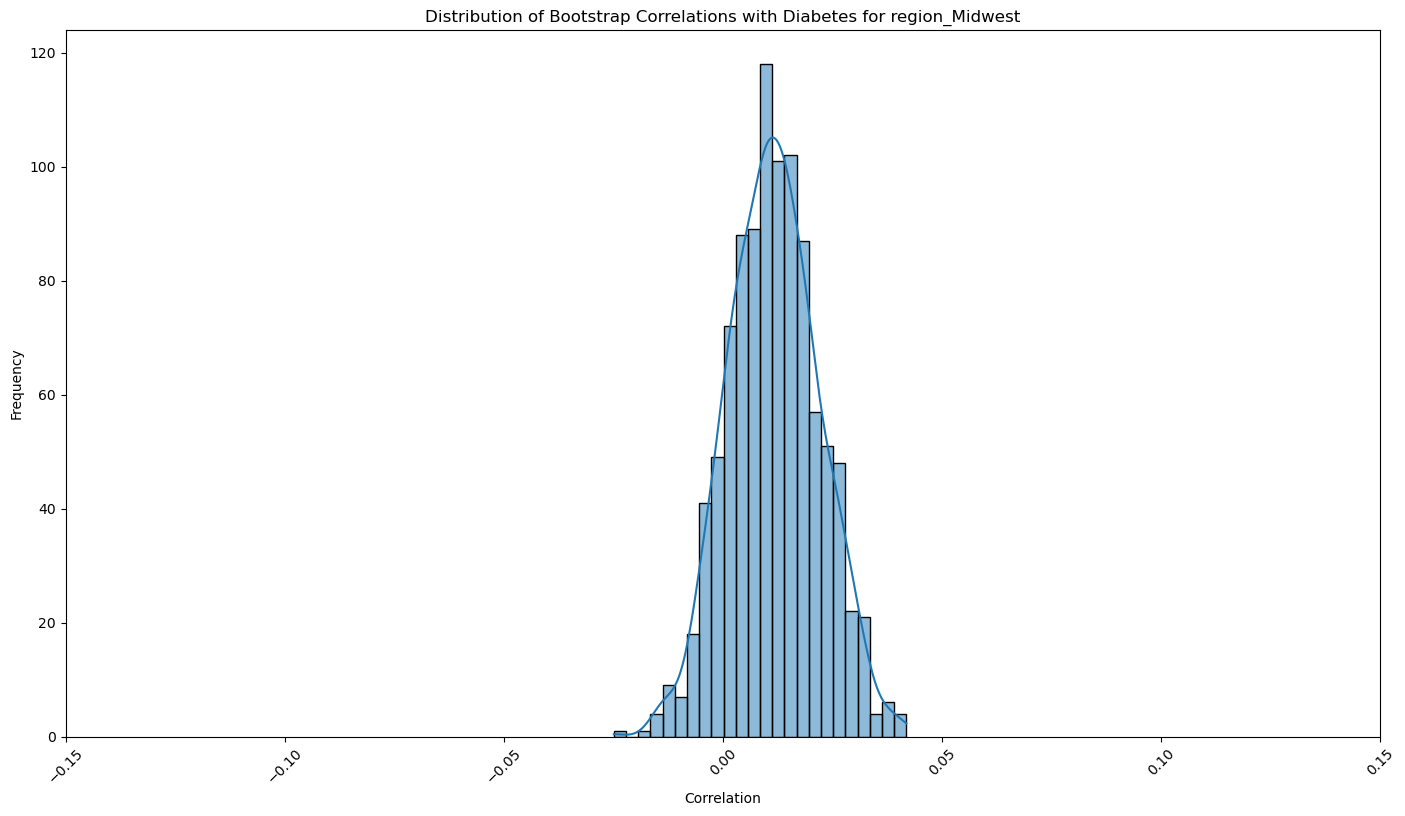

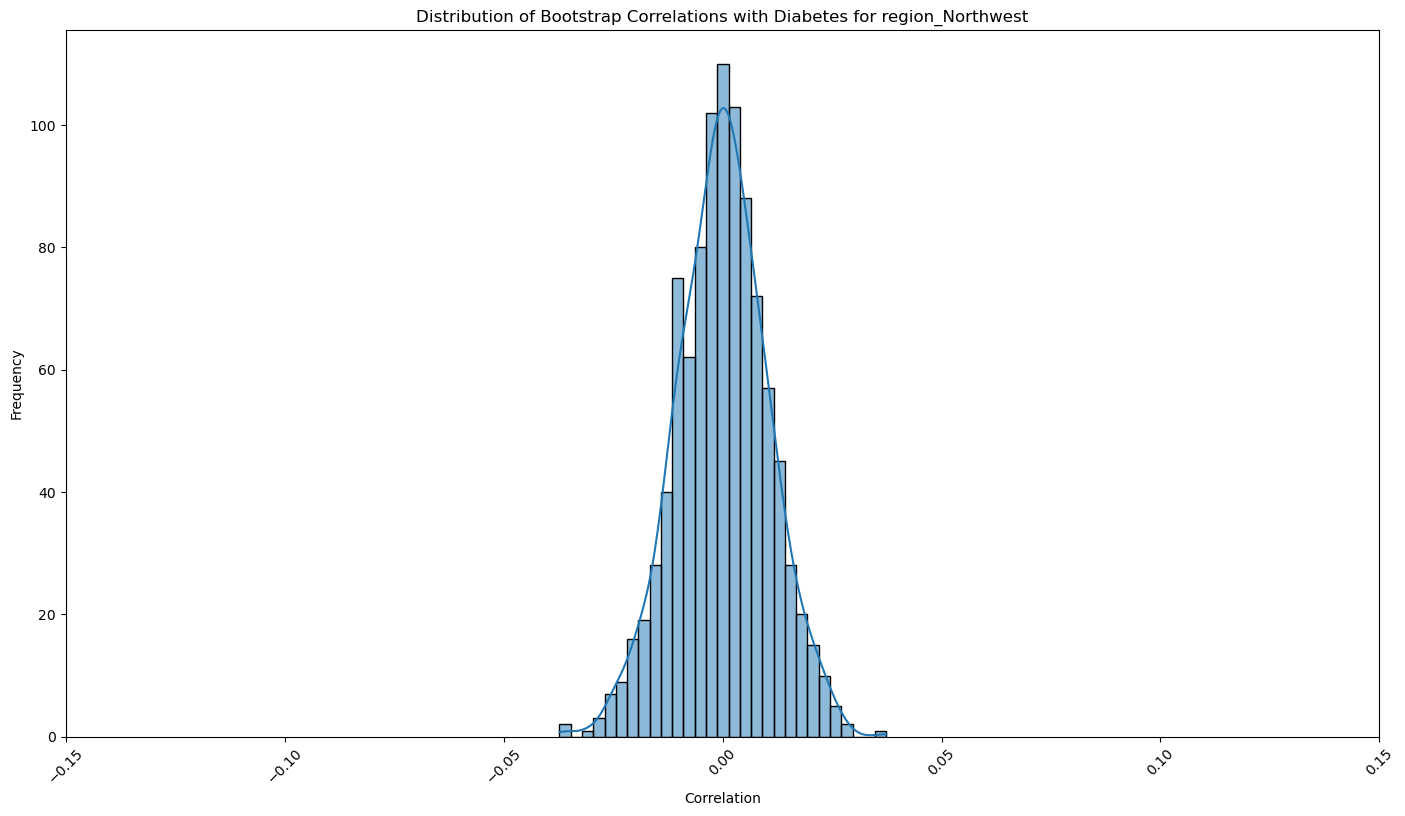

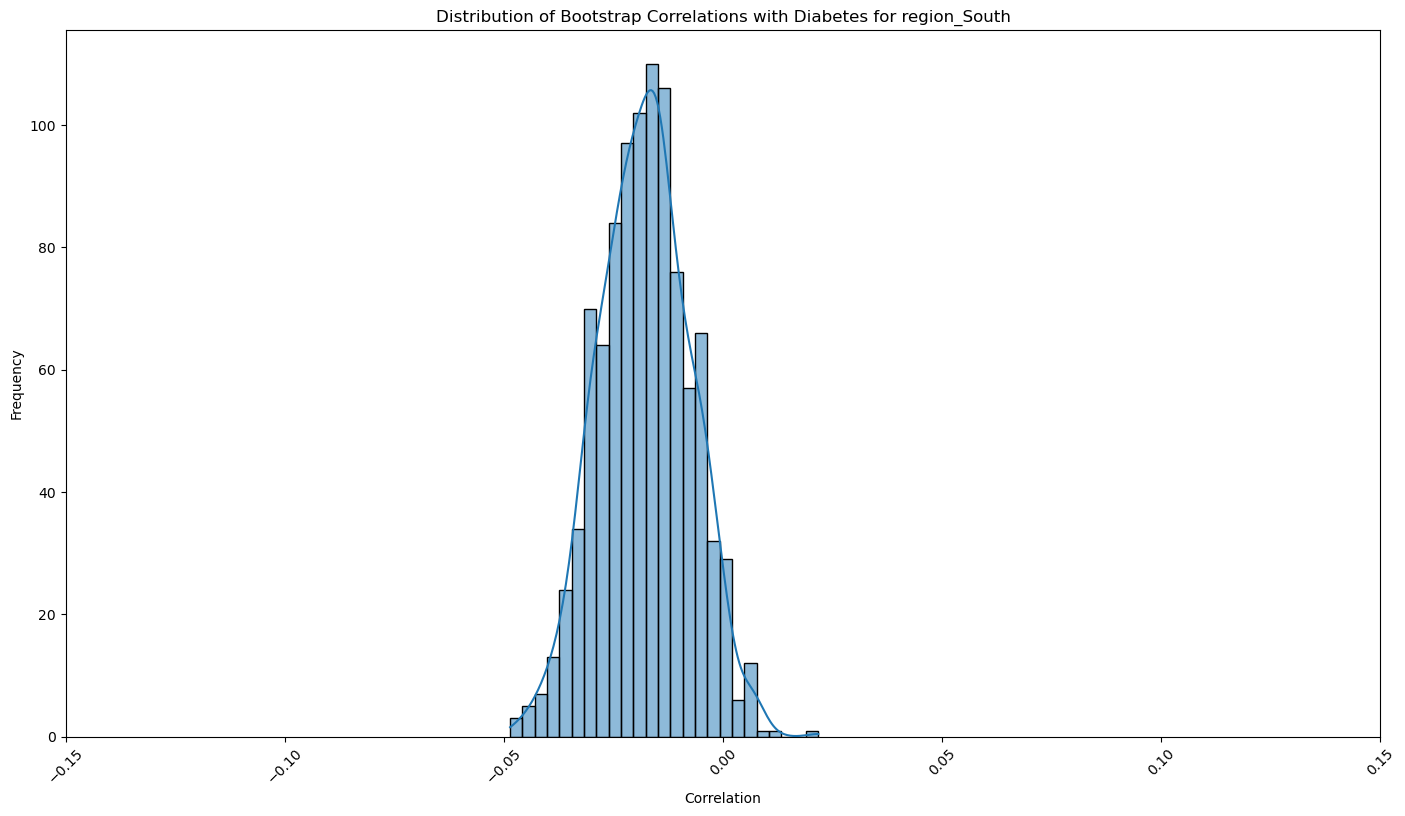

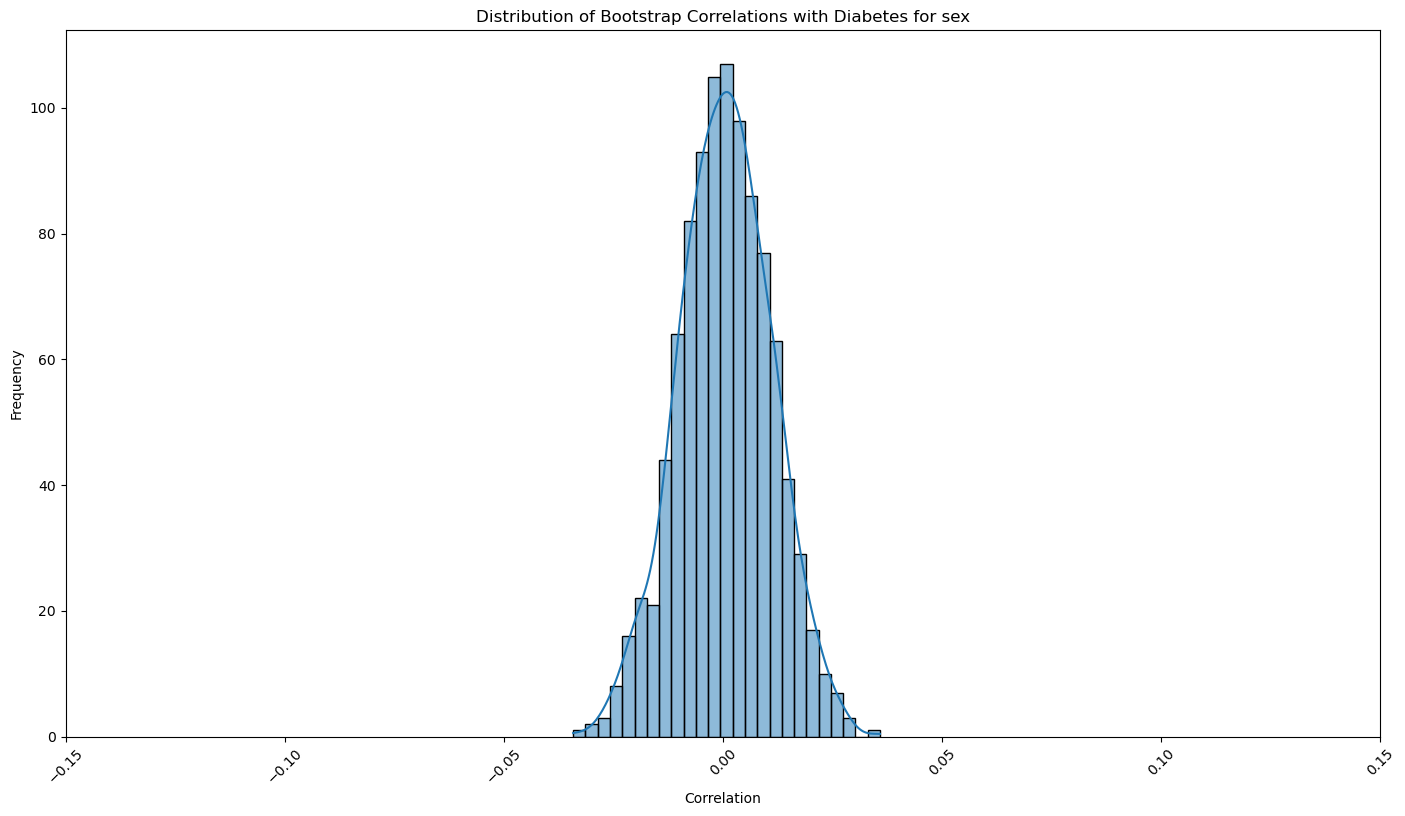

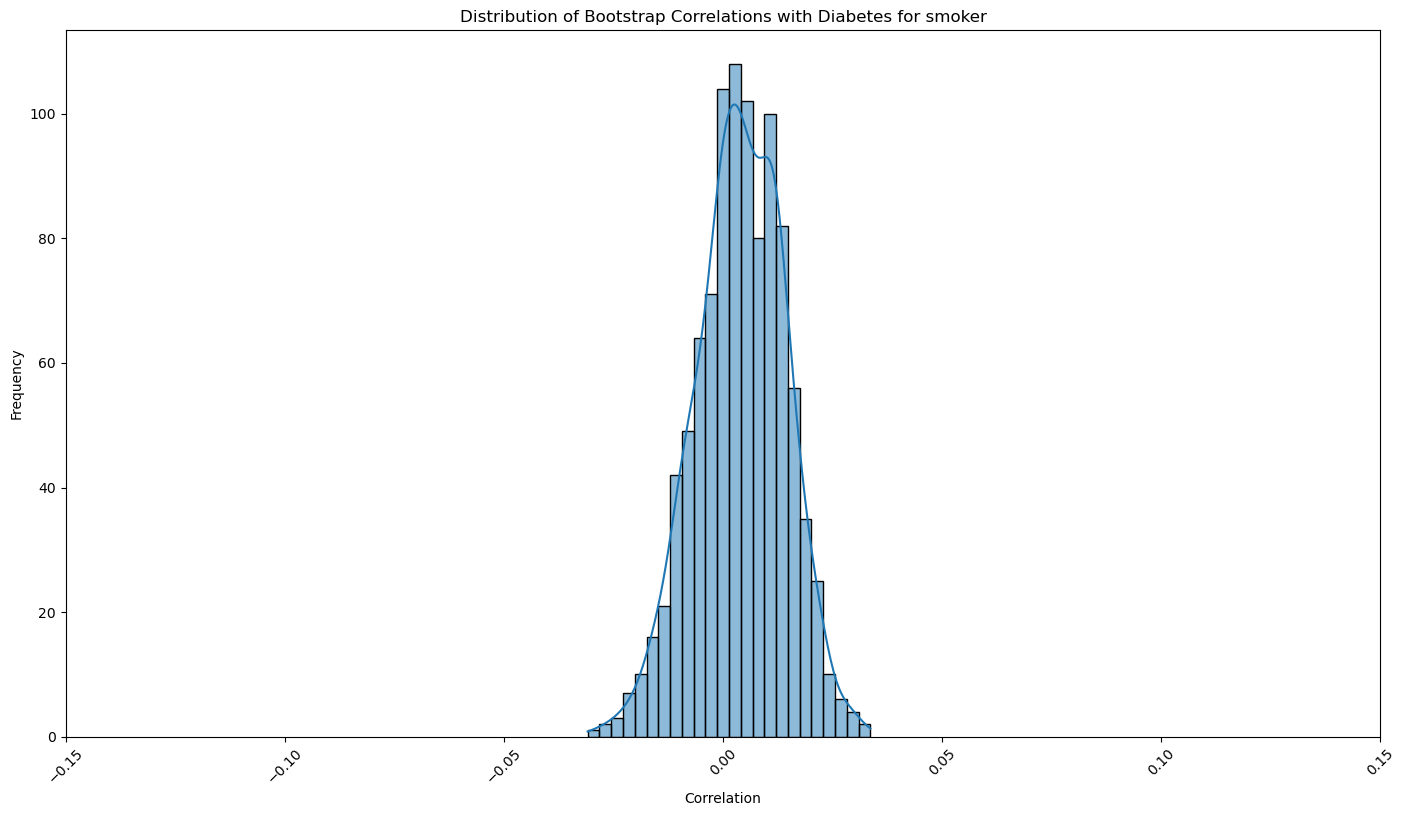

Bootstrap Correlation Means:
cancer                                0.012399
coronary_heart_disease                0.054718
doctor_recommend_exercise             0.074651
family_history_diabetes               0.094583
heart_condition                       0.022084
high_blood_pressure_prescription      0.033167
hypertension                          0.083333
marital_status_Divorced              -0.000622
marital_status_Living with partner   -0.008436
marital_status_Married                0.015331
marital_status_Never_married         -0.021881
marital_status_Separated              0.006050
marital_status_Widdowed               0.034849
region_Midwest                        0.011598
region_Northwest                     -0.000064
region_South                         -0.017855
sex                                   0.000526
smoker                                0.004008
dtype: float64

Bootstrap Correlation Standard Deviations:
cancer                                0.010850
coronary_heart_dise

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming train_data is already loaded and cat_columns_plot is defined
# Number of bootstrap samples
n_bootstrap_samples = 1000

# Store the correlation values for each bootstrap sample
bootstrap_correlations = []

for _ in range(n_bootstrap_samples):
    # Sample with replacement
    bootstrap_sample = train_data.sample(frac=1, replace=True)
    
    # Calculate the correlation matrix
    bootstrap_correlation_matrix = bootstrap_sample.corr()
    
    # Extract the correlation values of each category with the diabetes column
    bootstrap_correlations.append(bootstrap_correlation_matrix['diabetes'][cat_columns_plot].values)

# Convert to a DataFrame for easier analysis
bootstrap_correlations_df = pd.DataFrame(bootstrap_correlations, columns=cat_columns_plot)

# Calculate the mean and standard deviation of the bootstrap correlations
bootstrap_means = bootstrap_correlations_df.mean()
bootstrap_std = bootstrap_correlations_df.std()

# Plot the distribution of bootstrap correlations for each category on separate plots
for column in cat_columns_plot:
    plt.figure(figsize=(14, 8))
    sns.histplot(bootstrap_correlations_df[column], kde=True)
    plt.title(f'Distribution of Bootstrap Correlations with Diabetes for {column}')
    plt.xlabel('Correlation')
    plt.ylabel('Frequency')
    plt.tight_layout()
    xticks = plt.xticks(rotation=45)
    plt.xlim(-0.15, 0.15)  # Limit the x-axis to focus on the correlation values
    plt.show()

# Print the mean and standard deviation of the bootstrap correlations
print("Bootstrap Correlation Means:")
print(bootstrap_means)
print("\nBootstrap Correlation Standard Deviations:")
print(bootstrap_std)

Original Correlations:
cancer                                0.011817
coronary_heart_disease                0.054784
doctor_recommend_exercise             0.074629
family_history_diabetes               0.094811
heart_condition                       0.021992
high_blood_pressure_prescription      0.034333
hypertension                          0.083792
marital_status_Divorced              -0.000720
marital_status_Living with partner   -0.007980
marital_status_Married                0.015138
marital_status_Never_married         -0.021822
marital_status_Separated              0.006113
marital_status_Widdowed               0.034745
region_Midwest                        0.012160
region_Northwest                      0.000479
region_South                         -0.017275
sex                                   0.000416
smoker                                0.004480
Name: diabetes, dtype: float64
Comparison of Original Correlations and Bootstrap Means:
                                    Origina

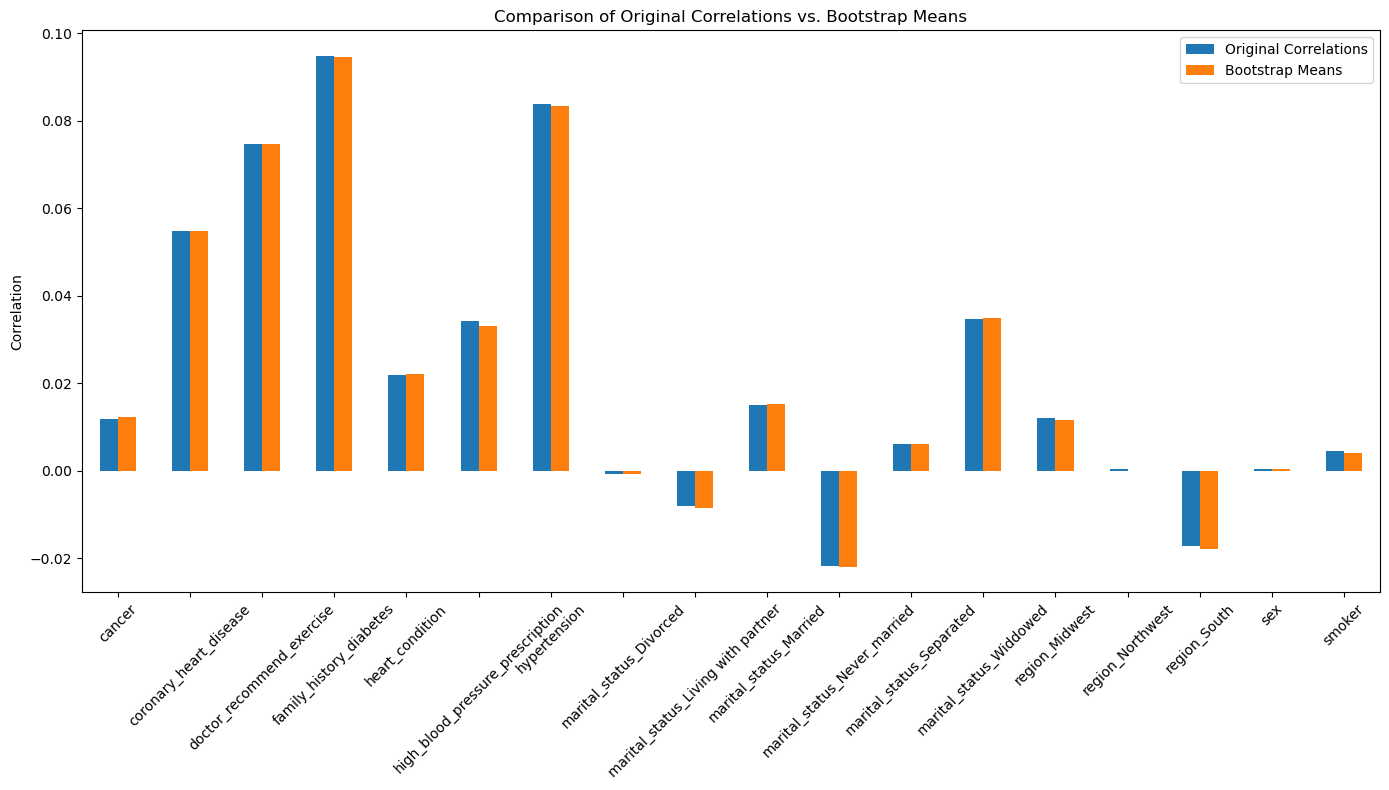

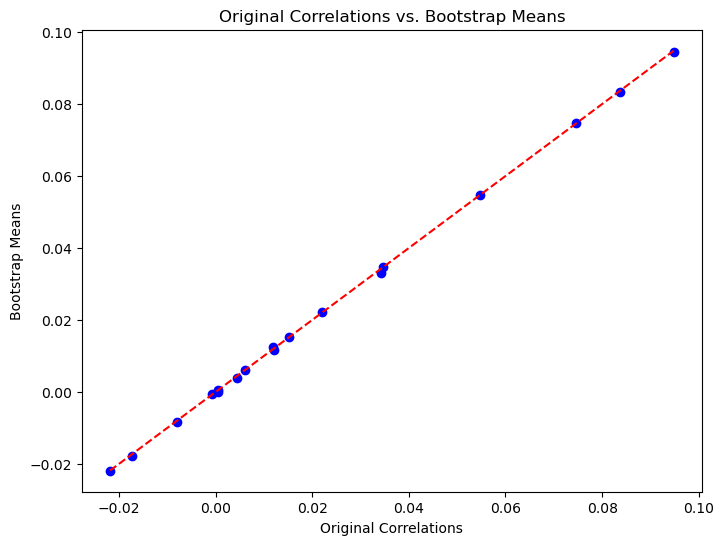

In [33]:
# Calculate the original correlation matrix on the original dataset
original_correlation_matrix = train_data.corr()

# Extract the original correlations of each category with the diabetes column
original_correlations = original_correlation_matrix['diabetes'][cat_columns_plot]

# Print the original correlations
print("Original Correlations:")
print(original_correlations)

# Combine original correlations and bootstrap means into a DataFrame
comparison_df = pd.DataFrame({
    'Original Correlations': original_correlations,
    'Bootstrap Means': bootstrap_means
})

# Print the comparison
print("Comparison of Original Correlations and Bootstrap Means:")
print(comparison_df)

# Bar plot to compare original correlations and bootstrap means
comparison_df.plot(kind='bar', figsize=(14, 8))
plt.title('Comparison of Original Correlations vs. Bootstrap Means')
plt.ylabel('Correlation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 6))
plt.scatter(original_correlations, bootstrap_means, marker='o', color='b')

# Add a line for perfect agreement (y = x)
plt.plot([min(original_correlations), max(original_correlations)],
         [min(original_correlations), max(original_correlations)], color='r', linestyle='--')

plt.xlabel('Original Correlations')
plt.ylabel('Bootstrap Means')
plt.title('Original Correlations vs. Bootstrap Means')
plt.show()


Original Correlations, 95% CI, and Stability Check:
cancer                                True
coronary_heart_disease                True
doctor_recommend_exercise             True
family_history_diabetes               True
heart_condition                       True
high_blood_pressure_prescription      True
hypertension                          True
marital_status_Divorced               True
marital_status_Living with partner    True
marital_status_Married                True
marital_status_Never_married          True
marital_status_Separated              True
marital_status_Widdowed               True
region_Midwest                        True
region_Northwest                      True
region_South                          True
sex                                   True
smoker                                True
Name: Is Stable (Within CI), dtype: bool


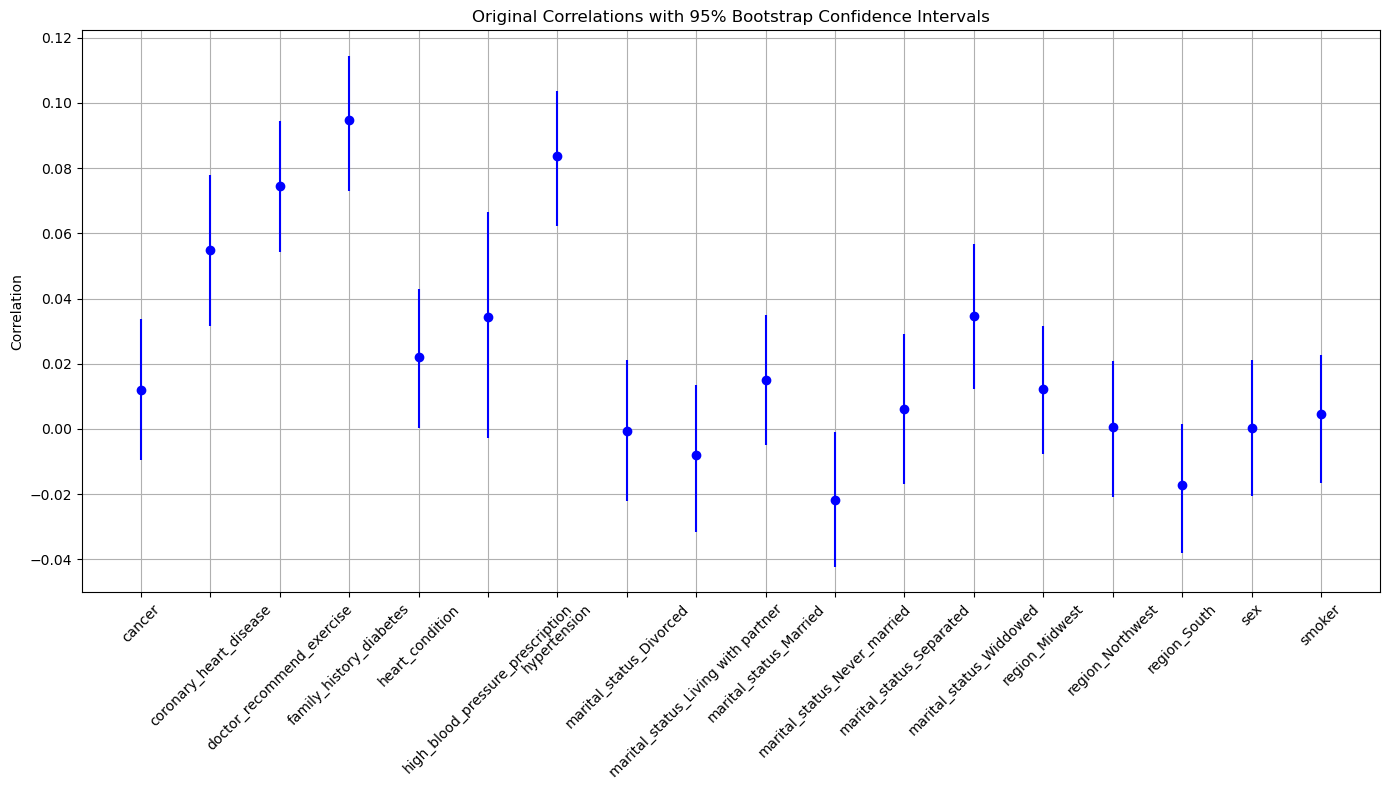

In [34]:
# Calculate the 95% confidence intervals for each categorical variable
bootstrap_ci_lower = bootstrap_correlations_df.quantile(0.025)
bootstrap_ci_upper = bootstrap_correlations_df.quantile(0.975)

# Combine the original correlations and bootstrap confidence intervals into a DataFrame
ci_df = pd.DataFrame({
    'Original Correlations': original_correlations,
    'Bootstrap CI Lower (2.5%)': bootstrap_ci_lower,
    'Bootstrap CI Upper (97.5%)': bootstrap_ci_upper
})


# Check if original correlations fall within the 95% confidence interval
ci_df['Is Stable (Within CI)'] = (ci_df['Original Correlations'] >= ci_df['Bootstrap CI Lower (2.5%)']) & \
                                 (ci_df['Original Correlations'] <= ci_df['Bootstrap CI Upper (97.5%)'])

# Print the updated DataFrame
print("Original Correlations, 95% CI, and Stability Check:")
print(ci_df['Is Stable (Within CI)'])


# Visualizing original correlations with confidence intervals
plt.figure(figsize=(14, 8))
for i, column in enumerate(cat_columns_plot):
    plt.errorbar(i, original_correlations[column], 
                 yerr=[[original_correlations[column] - bootstrap_ci_lower[column]], 
                       [bootstrap_ci_upper[column] - original_correlations[column]]],
                 fmt='o', color='blue', label=column if i == 0 else "")

plt.xticks(range(len(cat_columns_plot)), cat_columns_plot, rotation=45)
plt.title('Original Correlations with 95% Bootstrap Confidence Intervals')
plt.ylabel('Correlation')
plt.grid(True)
plt.tight_layout()
plt.show()

